In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import roc_curve

In [10]:
print(sklearn.__version__)

0.22.1


In [11]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [12]:
data.dtypes
# No datatype is object 

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [13]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [14]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [15]:
data.shape

(5000, 14)

In [16]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [17]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [18]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

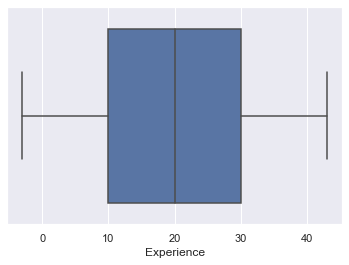

In [19]:
sns.boxplot(x="Experience", data = data);

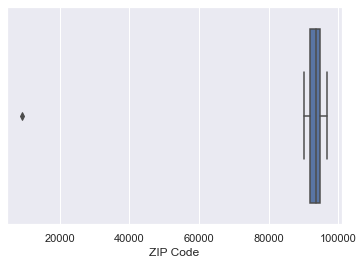

In [20]:
sns.boxplot(x="ZIP Code", data = data);

### Check experience 0 or negative cases

In [21]:
experience_odd = data.where(data['Experience'] <= 0).dropna()
print(experience_odd.head())
experience_odd.to_csv('experience_odd.csv')

        ID   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
89    90.0  25.0        -1.0   113.0   94303.0     4.0    2.3        3.0   
105  106.0  24.0         0.0    35.0   94704.0     3.0    0.1        2.0   
151  152.0  26.0         0.0   132.0   92834.0     3.0    6.5        3.0   
155  156.0  24.0         0.0    60.0   94596.0     4.0    1.6        1.0   
156  157.0  26.0         0.0    15.0   92131.0     4.0    0.4        1.0   

     Mortgage  Personal Loan  Securities Account  CD Account  Online  \
89        0.0            0.0                 0.0         0.0     0.0   
105       0.0            0.0                 1.0         0.0     1.0   
151       0.0            1.0                 0.0         0.0     0.0   
155       0.0            0.0                 0.0         0.0     1.0   
156       0.0            0.0                 0.0         0.0     0.0   

     CreditCard  
89          1.0  
105         0.0  
151         1.0  
155         0.0  
156         1.0  


### check experience negative only. Zero years experience and showing income may be due to other sources - investment income etc

In [22]:
experience_neg = data.where(data['Experience'] < 0).dropna()
print(experience_neg)
experience_neg.to_csv('experience_neg.csv')
print(experience_neg.shape)

          ID   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
89      90.0  25.0        -1.0   113.0   94303.0     4.0   2.30        3.0   
226    227.0  24.0        -1.0    39.0   94085.0     2.0   1.70        2.0   
315    316.0  24.0        -2.0    51.0   90630.0     3.0   0.30        3.0   
451    452.0  28.0        -2.0    48.0   94132.0     2.0   1.75        3.0   
524    525.0  24.0        -1.0    75.0   93014.0     4.0   0.20        1.0   
536    537.0  25.0        -1.0    43.0   92173.0     3.0   2.40        2.0   
540    541.0  25.0        -1.0   109.0   94010.0     4.0   2.30        3.0   
576    577.0  25.0        -1.0    48.0   92870.0     3.0   0.30        3.0   
583    584.0  24.0        -1.0    38.0   95045.0     2.0   1.70        2.0   
597    598.0  24.0        -2.0   125.0   92835.0     2.0   7.20        1.0   
649    650.0  25.0        -1.0    82.0   92677.0     4.0   2.10        3.0   
670    671.0  23.0        -1.0    61.0   92374.0     4.0   2.60 

#### 52 rows with Negative experience 

In [23]:
experience_neg.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.000000,52.0,52.000000,52.000000
mean,2427.346154,24.519231,-1.442308,69.942308,93240.961538,2.865385,2.129423,2.076923,43.596154,0.0,0.115385,0.0,0.576923,0.288462
std,1478.834118,1.475159,0.639039,37.955295,1611.654806,0.970725,1.750562,0.836570,90.027068,0.0,0.322603,0.0,0.498867,0.457467
min,90.000000,23.000000,-3.000000,12.000000,90065.000000,1.000000,0.200000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,767.250000,24.000000,-2.000000,40.750000,92167.750000,2.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,2783.500000,24.000000,-1.000000,65.500000,93060.000000,3.000000,1.800000,2.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000
75%,3669.500000,25.000000,-1.000000,86.750000,94720.000000,4.000000,2.325000,3.000000,0.000000,0.0,0.000000,0.0,1.000000,1.000000
max,4958.000000,29.000000,-1.000000,150.000000,95842.000000,4.000000,7.200000,3.000000,314.000000,0.0,1.000000,0.0,1.000000,1.000000


### The dataframe with neative experince records shows that the age aries from 23 to 29 , with negative experience varying from -3 to -1
#### To check if similar age/experience profile exixts with positive experience data , with simliar min/max age range
### Also noted that in the negative experience case , none of the 52 records show Personal Loan taken

In [24]:
experience_pos_age_group_23_to_29 = data.where( (data['Experience'] > 0) & (data['Age'].between(23,29,inclusive=True) )  ).dropna()

#print(experience_pos_age_group_23_to_29)
experience_neg.to_csv('experience_pos_age_group_23_to_29.csv')
#print(experience_pos_age_group_23_to_29.shape)

In [25]:
experience_pos_age_group_23_to_29.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,2352.466307,27.687332,2.792453,82.164420,93240.687332,2.619946,1.911321,1.760108,65.442049,0.113208,0.080863,0.043127,0.584906,0.309973
std,1449.535149,1.189743,1.242294,47.058359,1802.888766,1.177965,1.598167,0.808150,113.394045,0.317274,0.272992,0.203417,0.493404,0.463107
min,1.000000,25.000000,1.000000,8.000000,90009.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1093.500000,27.000000,2.000000,43.000000,92022.000000,2.000000,0.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2227.000000,28.000000,3.000000,74.000000,93943.000000,3.000000,1.600000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3581.000000,29.000000,4.000000,113.500000,94709.000000,4.000000,2.500000,2.000000,117.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,29.000000,5.000000,205.000000,96651.000000,4.000000,8.300000,3.000000,612.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### The age varies from 25 to 29 , for positive experience figures , with experience ranging from 1 to 5 years
#### contrasting with negative experience data, where age varies from 23 to 29, & experience from -1 to -3

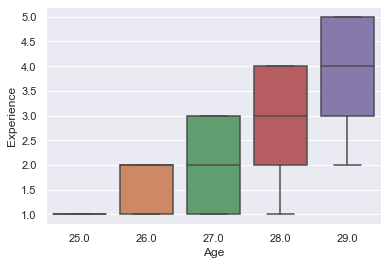

In [27]:
sns.boxplot(data= experience_pos_age_group_23_to_29 , x= 'Age' ,y= 'Experience' );

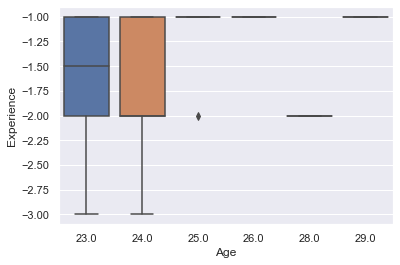

In [34]:
sns.boxplot(data= experience_neg , x= 'Age' ,y= 'Experience' );

### Check if age vs positive experince has similar experince numbers as in the 52 negative experince cases. To check if by mistake , a negative sign was used when adding record , for experience


###  NOTE : Checking the boxplots for Age Vs Experience for positive and negative experince dataframes , it is seen that:
1> For dataframe with only positive experiences , the expereince startes from age 25 = 0     
2> For dataframe with negative experince , the negative experience is for ages 23 and 24 , with outliers for age 25     
3> For dataframe with negative experince , there is no negative experience for ages 26 , 28 and 29.

Given above , we can drop the negative expereince records as it does not justify replacing negative experince 
by a similar experince positive value ( -1 yer replaced by 1) or using other croteria like replace by mode of each year experince values

In [35]:
data_dropped_neg_exp = data.where(data['Experience'] >= 0).dropna()
#print(data_dropped_neg_exp)

### NOTE : check where experience is greater than age - zero records

In [36]:
experience_gt_age = data.where(data['Experience'] > data['Age']).dropna()
print(experience_gt_age)

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


### Zip code min is 4 digits ,and max is 5 digits. Finding all ZIP codes where it is less than 10000 - one record

In [37]:
zip_odd = data.where(data['ZIP Code'] < 10000).dropna()
print(zip_odd)
print(zip_odd.shape)

        ID   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
384  385.0  51.0        25.0    21.0    9307.0     4.0    0.6        3.0   

     Mortgage  Personal Loan  Securities Account  CD Account  Online  \
384       0.0            0.0                 0.0         0.0     1.0   

     CreditCard  
384         1.0  
(1, 14)


### Check if any other ZIP ocde record exists , with zip code starting 9307 . Based on desscribe() , we see that
### ZIP codes all start with 9 , hence 9307 seems to be missing the last digit

### Since ZIP code is numeric , use numeric methods

In [38]:
data_ZIP = data['ZIP Code'].where( data['ZIP Code'].between(93000, 93099, inclusive=True) ).dropna().sort_values()
#print(data_ZIP)
print(data_ZIP)

4000    93003.0
3363    93003.0
4576    93003.0
3752    93003.0
1792    93009.0
3423    93009.0
659     93009.0
1555    93009.0
3979    93010.0
4337    93010.0
3839    93010.0
2446    93010.0
3455    93010.0
135     93010.0
1808    93010.0
1822    93014.0
3889    93014.0
3962    93014.0
2109    93014.0
2991    93014.0
1692    93014.0
1257    93014.0
869     93014.0
524     93014.0
4959    93014.0
1486    93022.0
1461    93022.0
4968    93022.0
4713    93022.0
3217    93022.0
4060    93023.0
4379    93023.0
4504    93023.0
3481    93023.0
9       93023.0
2533    93023.0
2935    93023.0
396     93023.0
523     93023.0
908     93023.0
1377    93023.0
1609    93023.0
3071    93023.0
1922    93023.0
4997    93023.0
2353    93023.0
2678    93023.0
1458    93033.0
2911    93033.0
2168    93063.0
2660    93063.0
798     93063.0
1897    93065.0
2588    93065.0
4419    93065.0
2035    93065.0
1845    93065.0
Name: ZIP Code, dtype: float64


### NOTE : There is no  ZIP code startig with 9307 , in data set. Hence rather than imputing for the 9307 wrong ZIP
### code record , need to drop it

### We have data_dropped_neg_exp dataframe. Drop the row with incorrect ZIP code

In [39]:
data_dropped_neg_exp_and_zip = data_dropped_neg_exp.where( data_dropped_neg_exp['ZIP Code'] > 10000).dropna() 
#data_dropped_neg_exp_and_zip

### data_dropped_neg_exp_and_zip gives us a datframe with 4947 records. One row for zip code 9307 dropped and also dropped 52 records with negative income

#### Drop ID column

In [40]:
data_good = data_dropped_neg_exp_and_zip.drop('ID', axis=1)
#data_good

### data_good is the dataframe to be used for the model , after dummifying the catergorical variables 


## 2. EDA

### Check skeweness  after removing all categorical data

In [41]:
data_1 = data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']]
print( '\033[34m\033[1mThe skewness values for non-categorical data are :\033[0m\n', data_1.skew())

The skewness values for non-categorical data are :
 Age          -0.029341
Experience   -0.026325
Income        0.841339
CCAvg         1.598443
Mortgage      2.104002
dtype: float64


#### It can be seen that Age / Experience show a slight negative skew .

#### Income / CCAvg and Mortgage show positive skewness . The maximum right skewness is for Mortgage data

### Check kurtosis after removing all categorical data ( measures the excess kurtosis)

In [42]:
data_1 = data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']]
print('\033[34m\033[1mThe kurtosis values for non-categorical data are :\033[0m\n',data_1.kurtosis())

The kurtosis values for non-categorical data are :
 Age          -1.153067
Experience   -1.121523
Income       -0.044244
CCAvg         2.646706
Mortgage      4.756797
dtype: float64


#### The kurtosis data suggessts that for Age / Experience & Income data , data has a light tail (shorter & thinner) . 
#### Though , for income , with kurtosis near zero , it indicates close to a normal distrution . Excess kurtosis = kurtosis-3 . For normal #### distribution kurtosis =3 , thus excess kurtosis for normal distribution = 0. 

#### For CcAvg and Mortgage there is a heavy tail (longer and thicker tails)

### 2.1 Number of unique values in each column

In [43]:
print('\033[34m\033[1mUnique values in each column are :\033[0m \n', data.nunique())

Unique values in each column are : 
 ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


### 2.2 Number of people with zero mortgage

In [44]:
zero_mortgage = data['Mortgage'].where(data['Mortgage']== 0).dropna()
print('\033[94m \033[1m Number of people with zero mortgages are :\033[0m', zero_mortgage.count())

  Number of people with zero mortgages are : 3462


### 2.3 Number of people with zero credit card spending per month

In [45]:
zero_cc = data['CCAvg'].where(data['CCAvg'] == 0).dropna()
print('\033[32m \033[1m Number of people with zero average credit card spend per month are :\033[0m',zero_cc.count())

  Number of people with zero average credit card spend per month are : 106


### 2.4 Value counts of all categorical columns

In [46]:
#data[['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]
cat_cols = data[['Family','Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]
cat_cols.apply(pd.Series.value_counts)

,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,NaN,NaN,4520.0,4478.0,4698.0,2016.0,3530.0
1,1472.0,2096.0,480.0,522.0,302.0,2984.0,1470.0
2,1296.0,1403.0,NaN,NaN,NaN,NaN,NaN
3,1010.0,1501.0,NaN,NaN,NaN,NaN,NaN
4,1222.0,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
print('\033[94m \033[1mValue count for Family is :\033[0m')
data['Family'].value_counts()

 Value count for Family is :


1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [48]:
print('\033[94m \033[1mValue count for Education is :\033[0m')
data['Education'].value_counts()

 Value count for Education is :


1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [49]:
print('\033[94m \033[1mValue count for Personal Loan is :\033[0m')
data['Personal Loan'].value_counts()

 Value count for Personal Loan is :


0    4520
1     480
Name: Personal Loan, dtype: int64

In [50]:
print('\033[94m \033[1mValue count for Securities Account is :\033[0m')
data['Securities Account'].value_counts()

 Value count for Securities Account is :


0    4478
1     522
Name: Securities Account, dtype: int64

In [51]:
print('\033[94m \033[1mValue count for CD Account is :\033[0m')
data['CD Account'].value_counts()

 Value count for CD Account is :


0    4698
1     302
Name: CD Account, dtype: int64

In [52]:
print('\033[94m \033[1mValue count for Online type account is :\033[0m')
data['Online'].value_counts()

 Value count for Online type account is :


1    2984
0    2016
Name: Online, dtype: int64

In [53]:
print('\033[94m \033[1mValue count for accounts with credit card is :\033[0m')
data['CreditCard'].value_counts()

 Value count for accounts with credit card is :


0    3530
1    1470
Name: CreditCard, dtype: int64

### Univariate data anlysis

In [54]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


##### Plotting Distribution plots for Non-Categorical variables

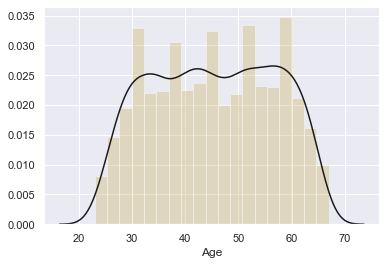

In [55]:
sns.distplot(data['Age'], color='y', kde_kws={"color": 'k'});


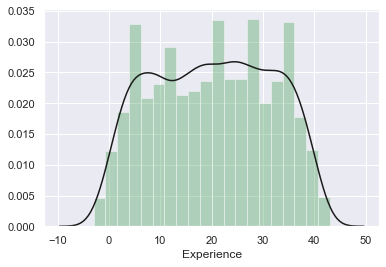

In [56]:
sns.distplot(data['Experience'], color='g', kde_kws={"color": 'k'});

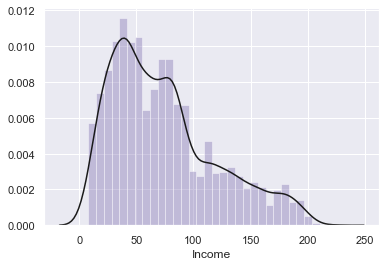

In [57]:
sns.distplot(data['Income'], color='m', kde_kws={"color": 'k'});

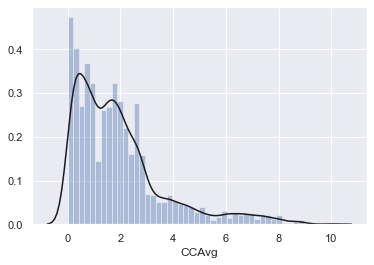

In [58]:
sns.distplot(data['CCAvg'], color='b', kde_kws={"color": 'k'});

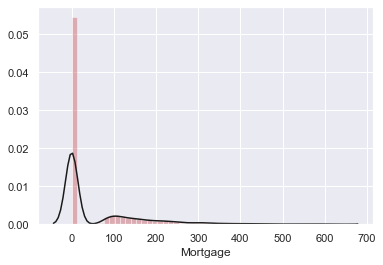

In [59]:
sns.distplot(data['Mortgage'], color='r', kde_kws={"color": 'k'});

### Bivariate Data Analysis

### we use data_1 after removing all categorical variable , to plot the pair plot

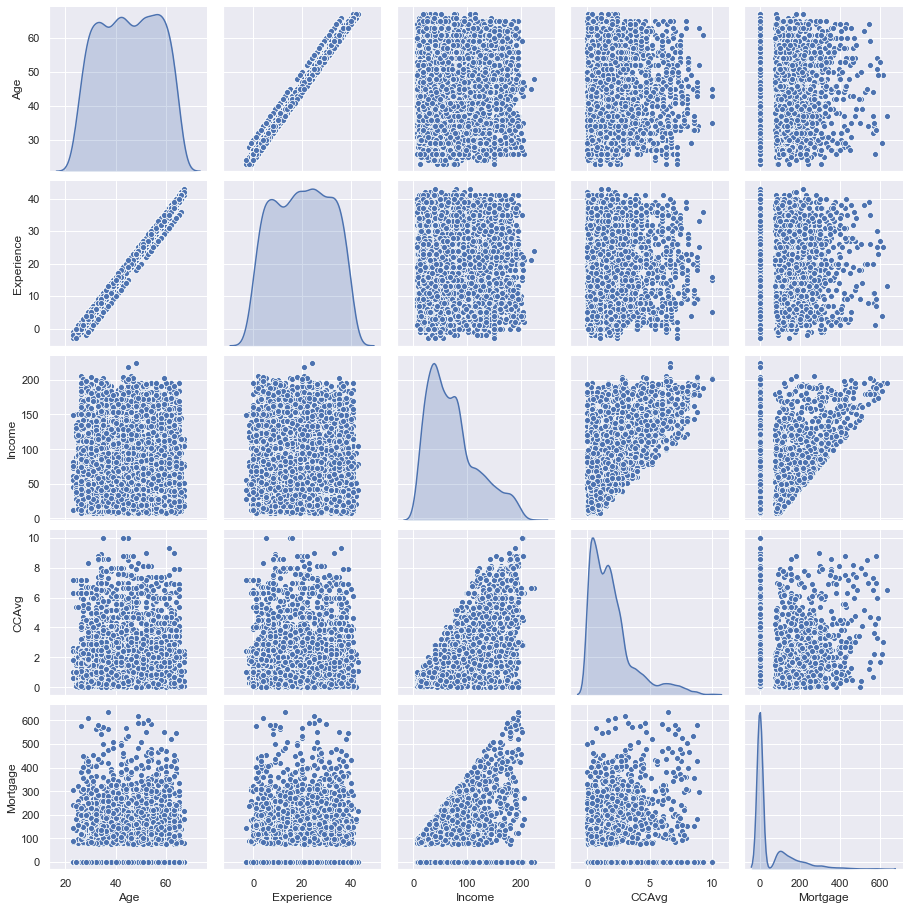

In [60]:
sns.pairplot(data_1, diag_kind='kde');

#### It can be seen that there is some data show correlation , but for others coorelation is less .Example : 
  1) Higher coorelation between Age and experience , also between income and credit card average spending .                   2) There is much less coorelation between Mortgage & income ,as well as between mortgage & credit card average spending. 
  3) There is negative correlation between age & income , age & mortgage, experience & income

In [61]:
data_1.corr()  ## data_1 = data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']]

,Age,Experience,Income,CCAvg,Mortgage
Age,1.000000,0.994215,-0.055269,-0.052012,-0.012539
Experience,0.994215,1.000000,-0.046574,-0.050077,-0.010582
Income,-0.055269,-0.046574,1.000000,0.645984,0.206806
CCAvg,-0.052012,-0.050077,0.645984,1.000000,0.109905
Mortgage,-0.012539,-0.010582,0.206806,0.109905,1.000000


#### Checking p-values

In [62]:
from scipy.stats import pearsonr

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

data_1.corr(method = pearsonr_pval)

,Age,Experience,Income,CCAvg,Mortgage
Age,1.000000,0.000000,9.226059e-05,2.337949e-04,3.753885e-01
Experience,0.000000,1.000000,9.868263e-04,3.966826e-04,4.544224e-01
Income,0.000092,0.000987,1.000000e+00,0.000000e+00,1.977484e-49
CCAvg,0.000234,0.000397,0.000000e+00,1.000000e+00,6.537882e-15
Mortgage,0.375388,0.454422,1.977484e-49,6.537882e-15,1.000000e+00


#### Using p-value pearson correlation coefficient analysis :
1> Highest correlation is between age & experience , followed by correlation between experience and mortgage
2> Lowest correlation is between income and mortgage , followed by correlation between credit card monthly average spend and 
    mortgage

### Person test is not applicable for categorical varaibles.

#### Check correlation pairplot with the dataframe having all variables

C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


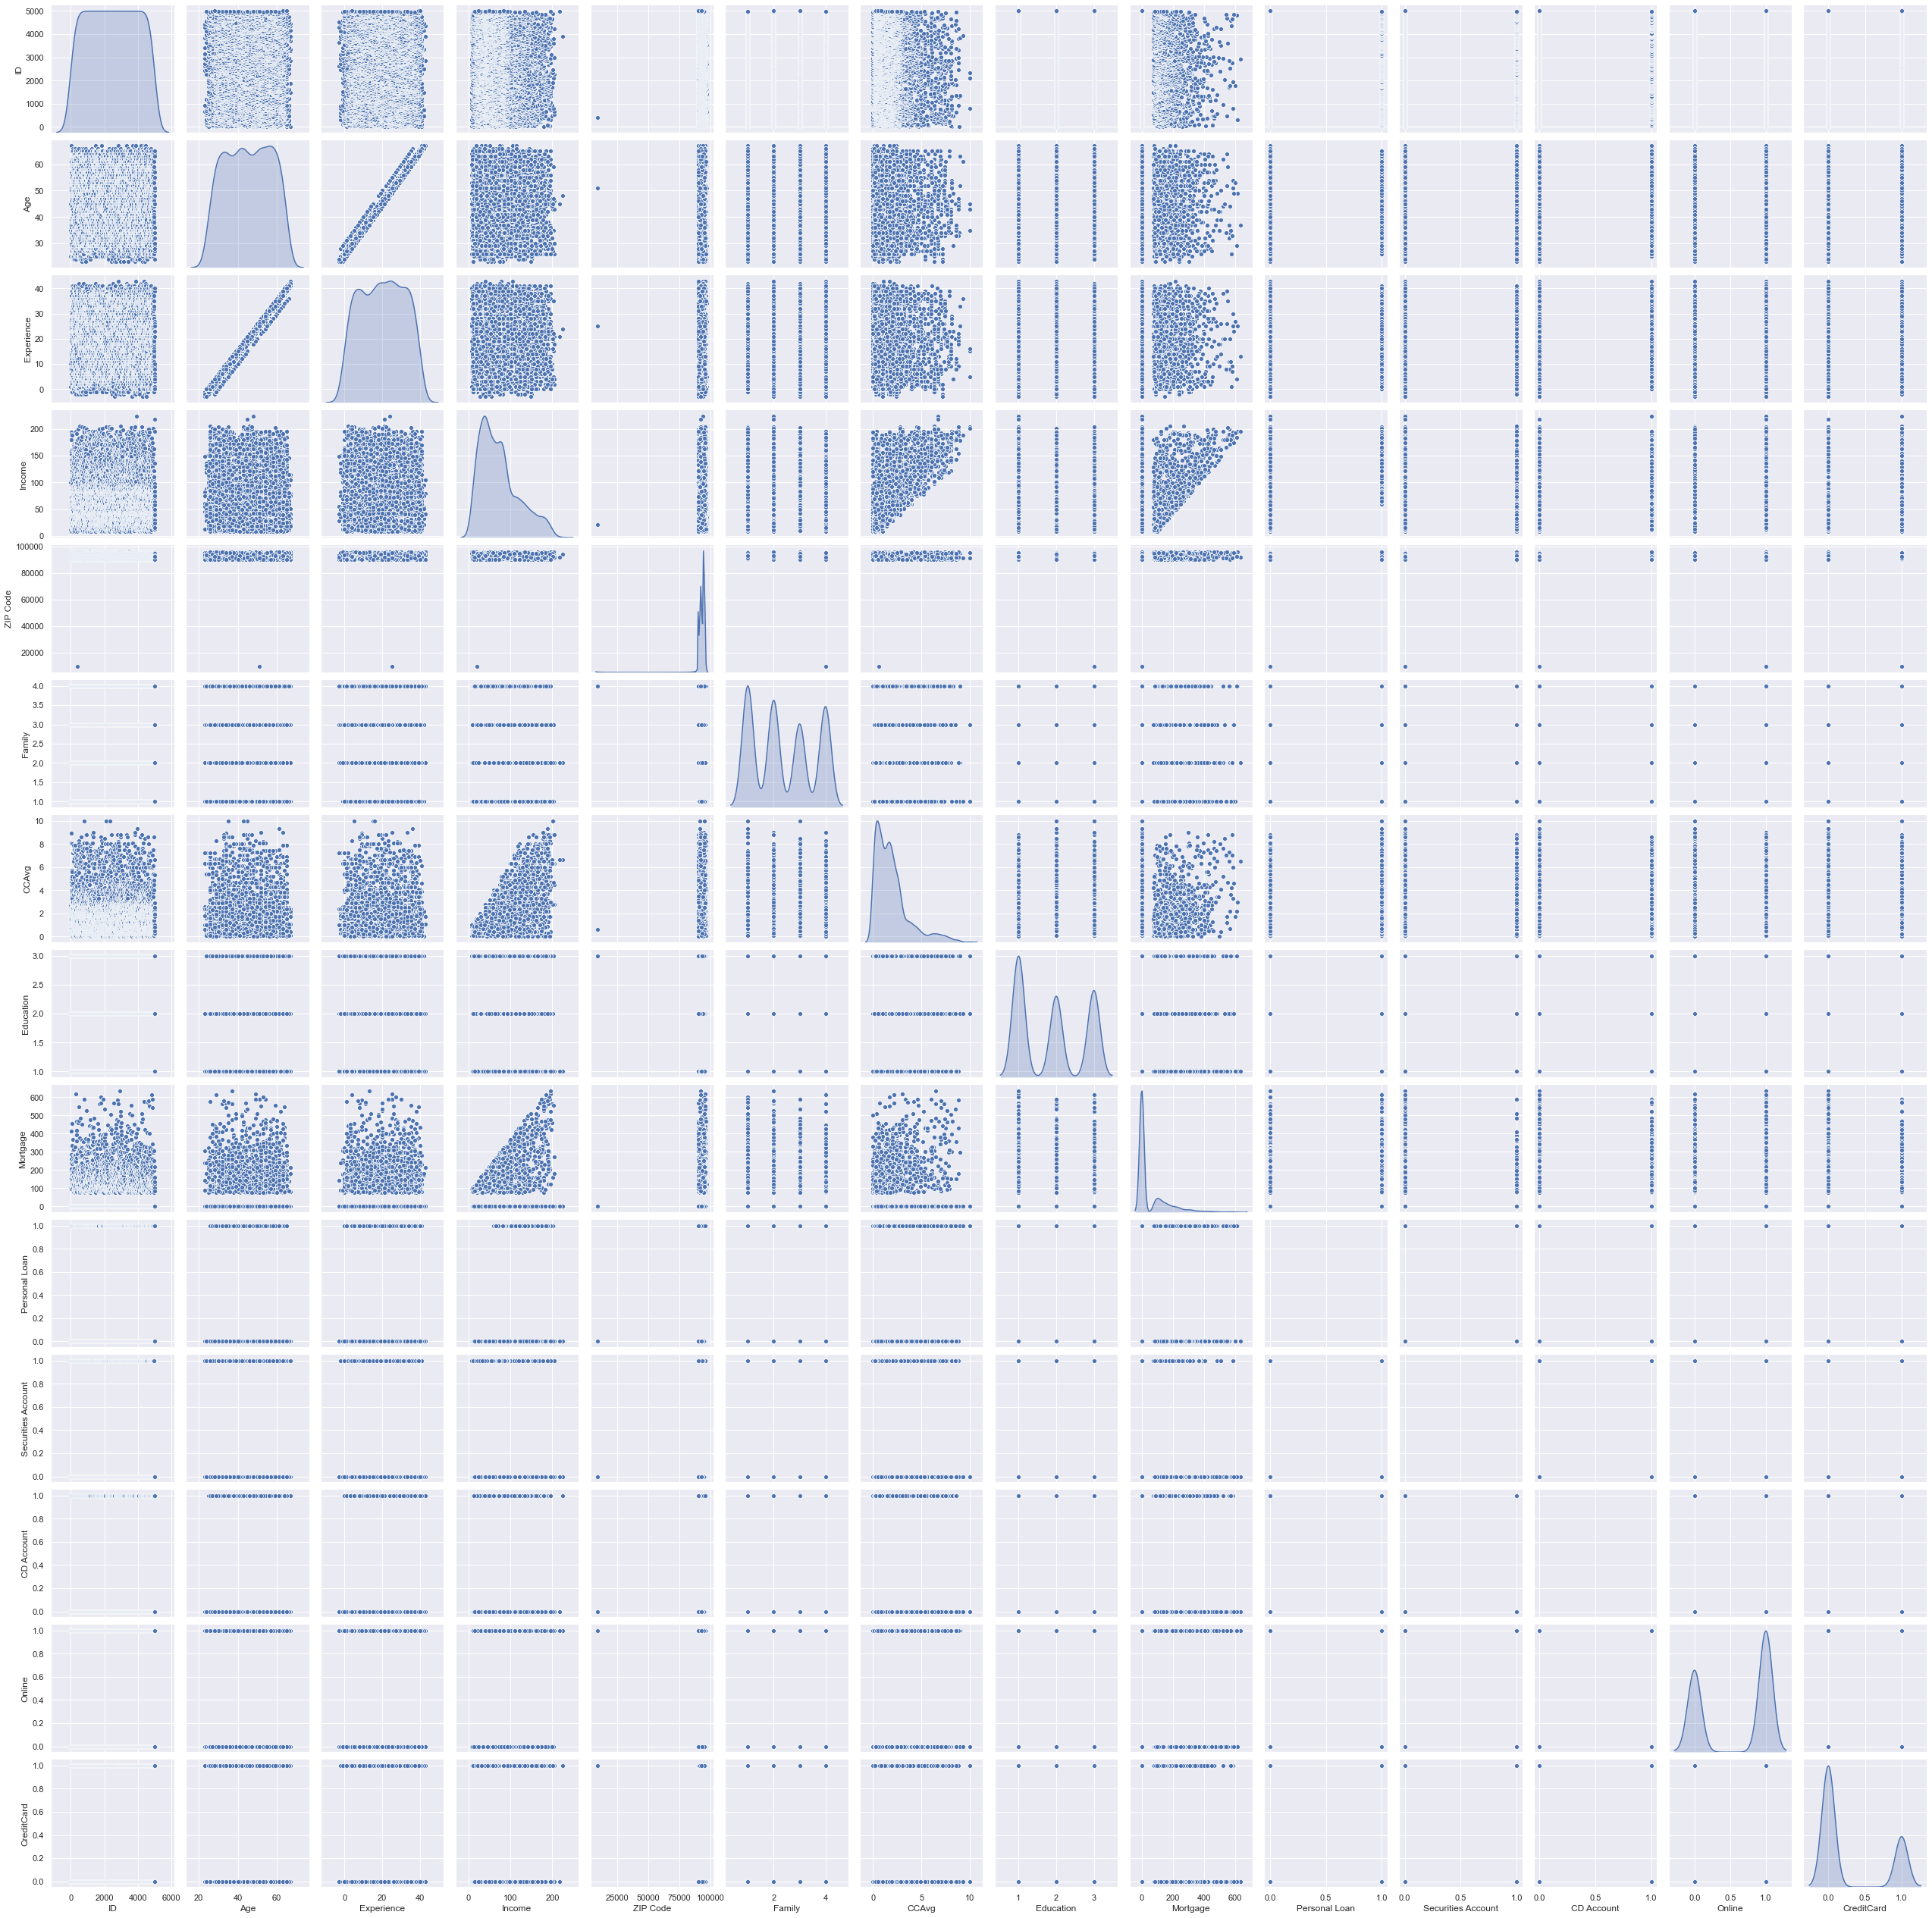

In [63]:
sns.pairplot( data , diag_kind = 'kde');

### Getting the data model ready
#### We can use the dataframe data_good which is the data after dropping incorrect ZIP code record , ID column 
####   and also does not contain any negative income records

In [64]:
### Checking categoroes for categorical variables - for creating dummy variables - Family and  Education 
cat_cols_good_data = data_good[['Family','Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]
cat_cols_good_data.apply(pd.Series.value_counts)

,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0.0,NaN,NaN,4467.0,4431.0,4645.0,1994.0,3493.0
1.0,1470.0,2080.0,480.0,516.0,302.0,2953.0,1454.0
2.0,1274.0,1387.0,NaN,NaN,NaN,NaN,NaN
3.0,1001.0,1480.0,NaN,NaN,NaN,NaN,NaN
4.0,1202.0,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
## Creatig dummy varaibles for Family and  Education 
data_train_test = pd.get_dummies(data_good, columns=(['Family', 'Education']))
data_train_test.head()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1.0,Family_2.0,Family_3.0,Family_4.0,Education_1.0,Education_2.0,Education_3.0
0,25.0,1.0,49.0,91107.0,1.6,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,1,0,0
1,45.0,19.0,34.0,90089.0,1.5,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,1,0,0
2,39.0,15.0,11.0,94720.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0
3,35.0,9.0,100.0,94112.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0
4,35.0,8.0,45.0,91330.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0,1,0


### The data is now model ready - with all categorical dummy variables

In [66]:
data_train_test.describe()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1.0,Family_2.0,Family_3.0,Family_4.0,Education_1.0,Education_2.0,Education_3.0
count,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000
mean,45.556095,20.330099,73.825147,93168.521932,1.936196,56.645846,0.097029,0.104306,0.061047,0.596927,0.293916,0.297150,0.257530,0.202345,0.242976,0.420457,0.280372,0.299171
std,11.321615,11.312922,46.111141,1761.253907,1.747768,101.835994,0.296026,0.305688,0.239441,0.490565,0.455600,0.457049,0.437318,0.401789,0.428924,0.493682,0.449226,0.457941
min,24.000000,0.000000,8.000000,90005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,10.500000,39.000000,91911.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,20.000000,64.000000,93437.000000,1.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,2.600000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,10.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
X = data_train_test.drop('Personal Loan', axis=1)
Y = data_train_test['Personal Loan']
print(X.head())
print(Y.head())

    Age  Experience  Income  ZIP Code  CCAvg  Mortgage  Securities Account  \
0  25.0         1.0    49.0   91107.0    1.6       0.0                 1.0   
1  45.0        19.0    34.0   90089.0    1.5       0.0                 1.0   
2  39.0        15.0    11.0   94720.0    1.0       0.0                 0.0   
3  35.0         9.0   100.0   94112.0    2.7       0.0                 0.0   
4  35.0         8.0    45.0   91330.0    1.0       0.0                 0.0   

   CD Account  Online  CreditCard  Family_1.0  Family_2.0  Family_3.0  \
0         0.0     0.0         0.0           0           0           0   
1         0.0     0.0         0.0           0           0           1   
2         0.0     0.0         0.0           1           0           0   
3         0.0     0.0         0.0           1           0           0   
4         0.0     0.0         1.0           0           0           0   

   Family_4.0  Education_1.0  Education_2.0  Education_3.0  
0           1              1   

### Ans 3.  Splitting the data into train and test , in 70:30 ratio

In [68]:
x_train , x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

In [69]:
x_train.head()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1.0,Family_2.0,Family_3.0,Family_4.0,Education_1.0,Education_2.0,Education_3.0
3528,43.0,17.0,41.0,90210.0,2.20,0.0,0.0,0.0,1.0,0.0,0,0,1,0,0,1,0
1558,35.0,10.0,72.0,91320.0,2.30,285.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0
1030,61.0,35.0,112.0,90024.0,1.70,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,1
1964,34.0,10.0,34.0,95060.0,1.50,111.0,0.0,0.0,0.0,1.0,1,0,0,0,0,1,0
4727,41.0,17.0,58.0,92009.0,2.67,0.0,0.0,0.0,1.0,1.0,0,0,0,1,1,0,0


In [70]:
x_test.head()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1.0,Family_2.0,Family_3.0,Family_4.0,Education_1.0,Education_2.0,Education_3.0
2855,35.0,11.0,38.0,91706.0,1.5,136.0,0.0,0.0,1.0,0.0,1,0,0,0,0,1,0
4158,59.0,34.0,74.0,92780.0,0.7,0.0,0.0,0.0,1.0,1.0,0,0,0,1,1,0,0
2467,40.0,16.0,83.0,92350.0,0.8,230.0,1.0,0.0,1.0,0.0,1,0,0,0,0,1,0
900,30.0,4.0,51.0,94709.0,0.2,172.0,0.0,0.0,0.0,1.0,0,0,0,1,1,0,0
3837,44.0,19.0,40.0,92350.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0,1,0


#### Checking split of data

In [71]:
print(' Training set data is: ' , len(x_train), 'which is {:2.2%}'.format(len(x_train)/len(data_train_test)) )
print(' Testing set data is: ' , len(x_test), 'which is {:2.2%}'.format(len(x_test)/len(data_train_test)) )

 Training set data is:  3462 which is 69.98%
 Testing set data is:  1485 which is 30.02%


#### Person Loan True/False in the test & train data

In [72]:
train_true_count = y_train.where(y_train == True).count()
train_false_count = y_train.where(y_train == False).count()

test_true_count = y_test.where(y_test == True).count()
test_false_count = y_test.where(y_test == False).count()

print('True count total in Training dataset is: ', train_true_count , ', which is :{:2.2%}'.format(train_true_count/(train_true_count+train_false_count)) )
print('False count total in Training dataset is: ', train_false_count, ', which is {:2.2%}'.format(train_false_count/(train_true_count+train_false_count)),'\n')

print('True count total in Test dataset is: ', test_true_count , ', which is :{:2.2%}'.format(test_true_count/(test_true_count+test_false_count)) )
print('False count total in Test dataset is: ', test_false_count, ', which is {:2.2%}'.format(test_false_count/(test_true_count+test_false_count)))


True count total in Training dataset is:  334 , which is :9.65%
False count total in Training dataset is:  3128 , which is 90.35% 

True count total in Test dataset is:  146 , which is :9.83%
False count total in Test dataset is:  1339 , which is 90.17%


#### The True/False count for Personal loan in both train and test data is similar.Hence train data is a good representation

## 4 Use Scikit Learn Logistic Regression modelling tool

In [73]:
from sklearn.linear_model import LogisticRegression

# Fit model on Training data
#model = LogisticRegression(solver = 'liblinear')
model = LogisticRegression()
model.fit(x_train, y_train)

# predict on test
y_predict = model.predict(x_test)


coef = pd.DataFrame(model.coef_)
coef['intercept'] = model.intercept_

print('\033[94m\033[1mThe coefficient values are : \033[0m\n', coef, '\n')
print( '\033[94m\033[1mThe intercept value is : \033[0m\n', coef['intercept'], '\n')

model_score_train = model.score( x_train, y_train)
print( '\033[94m\033[1mModel Score for Training data , for default solver ', ' for training data is : \033[0m', model_score_train)
model_score_test = model.score( x_test, y_test) 
print(  '\033[94m\033[1mModel Score for Testing data , for default solver ', ' for test data is : \033[0m', model_score_test)

roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
print( '\033[94m\033[1mROC AUC value is : \033[0m', roc_auc_score(y_test,  model.predict_proba(x_test)[:,1]))

print('\033[94m\033[1mThe y_predict accuracy score for model ', 'is : \033[0m' , metrics.accuracy_score( y_test , y_predict))

print('\033[94m\033[1mThe precision score for model ', ' is \033[0m', metrics.average_precision_score( y_test, y_predict) )

print('\033[94m\033[1mThe recall score for model ', ' is \033[0m'  , metrics.recall_score( y_test, y_predict))

print('\033[94m\033[1mThe weighted F1 score for model ', ' is \033[0m'  , metrics.f1_score( y_test, y_predict, average='weighted'))


The coefficient values are : 
           0         1         2         3         4         5         6  \
0  0.006214  0.004244  0.036401 -0.000069  0.002439  0.000111  0.000412   

         7         8         9       10        11        12        13  \
0  0.00224  0.000148  0.000115 -0.00142 -0.001666  0.001514  0.001562   

         14       15        16  intercept  
0 -0.004898  0.00238  0.002507  -0.000011   

The intercept value is : 
 0   -0.000011
Name: intercept, dtype: float64 

Model Score for Training data , for default solver   for training data is :  0.9038128249566725
Model Score for Testing data , for default solver   for test data is :  0.9131313131313131
ROC AUC value is :  0.9229490419143298
The y_predict accuracy score for model  is :  0.9131313131313131
The precision score for model   is  0.2735621050689544
The recall score for model   is  0.3493150684931507
The weighted F1 score for model   is  0.9026289600221692


In [74]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [75]:
model.score( x_train , y_train)

0.9038128249566725

In [76]:
model_score = model.score( x_test, y_test)
print(model_score)

0.9131313131313131


In [77]:
metrics.accuracy_score( y_test , y_predict)

0.9131313131313131

In [78]:
metrics.average_precision_score( y_test, y_predict)

0.2735621050689544

In [79]:
metrics.recall_score( y_test, y_predict)

0.3493150684931507

#### Plotting using roc_curve

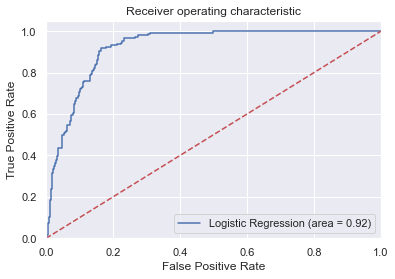

In [80]:
logit_roc_auc = roc_auc_score(y_test,  model.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Plotting ROC curve using plot_auc_curve

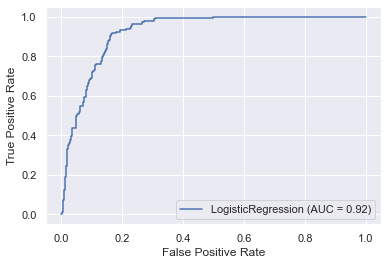

In [81]:
## Plot ROC Curve for lbfgs solver . This has max ROC AUC value
metrics.plot_roc_curve(model.fit(x_train, y_train), x_test, y_test)
plt.show()

###  Ans 4 . Metrics of the model , using the default 'lbfgs' solver.:
1> Model Score for Training data is :  0.9038128249566725                                      
2> Model Score for Testing data is :  0.9131313131313131                   
3> The RUC value is 0.6619614924243199                      
4> The accuracy score for model is also good at 0.9131313131313131                       
5> The precision score for model   is  0.2735621050689544                       
6> The recall score for model   is  0.3493150684931507                        
7> The weighted F1 score for model   is  0.9026289600221692 

In [82]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
print(cm)

[[  51   95]
 [  34 1305]]


### To print confusion matrix as a plot. Here True 1 refers to personal loan being taken , and True 0 refers to no personal loan

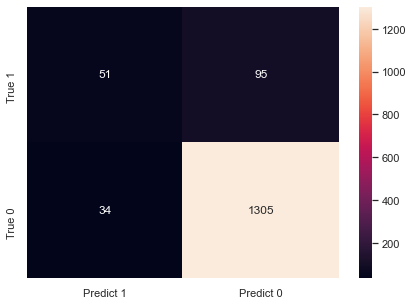

In [83]:
df_cm = pd.DataFrame(cm, index = [i for i in ["True 1", "True 0"]],
                     columns = [i for i in ["Predict 1", "Predict 0"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'd');

###    Ans 4.a : Logistic Regression has been performed  with default 'lbfgs' solver , and Confusion Matrix has been created . 

a) The number of customers , predicted by the model, who could buy Personal loan, is 84. However , only 51 of the     predicted persons actually got a personal loan. 

b) TP = 51                
c) TN = 1305             
d) FP = 34              
e) FN = 95            

f) The model metrics have been given in Ans.4 cell earlier. The scores are :

    1> Model Score for Training data is :  0.9038128249566725                                      
    2> Model Score for Testing data is :  0.9131313131313131                   
    3> The RUC value is 0.6619614924243199                      
    4> The accuracy score for model is also good at 0.9131313131313131                       
    5> The precision score for model   is  0.2735621050689544                       
    6> The recall score for model   is  0.3493150684931507                        
    7> The weighted F1 score for model   is  0.9026289600221692 

## 5 - How the model can perform better

In [84]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### Creating a df to store model regression results

In [85]:
results_df = pd.DataFrame(data=[[ '0', 0 ,0, 0,0,0,0,0]], columns = ['solver', 'Training score', 'Testing score', 'ROC AUC', 'Accuracy', 'Precision (average)', 'Recall', 'F1 (weighted)'])
row_index = 0
print(results_df)
print(row_index)

#row_index = row_index + 1
#print(row_index)
#results_df_data = ['test',1,1,1,1,1,1,1]

#results_df.iloc[row_index] = results_df_data
#results_df.loc[row_index] = results_df_data
results_df

  solver  Training score  Testing score  ROC AUC  Accuracy  \
0      0               0              0        0         0   

   Precision (average)  Recall  F1 (weighted)  
0                    0       0              0  
0


,solver,Training score,Testing score,ROC AUC,Accuracy,Precision (average),Recall,F1 (weighted)
0,0,0,0,0,0,0,0,0


###  5.1 Try with different solvers

In [86]:
# Fit model on Training data

s = ['lbfgs', 'sag', 'saga', 'liblinear']

results_df = pd.DataFrame([[ 'Diff solvers','solver','Norm.','penalty','class weight','C value','0', 0 ,0, 0,0,0,0,0]], 
                          columns = ['scenario','solver','Normalized','penalty','class weight','C value','solver', 'Training score', 'Testing score', 'ROC AUC', 'Accuracy','Precision (average)', 'Recall', 'F1 (weighted)'])
row_index = 0

for i in s:
    model1 = LogisticRegression(solver = i,  max_iter = 10000)
    model1.fit(x_train, y_train)

    # predict on test
    y1_predict = model1.predict(x_test)

    model_score_train1 = model1.score( x_train, y_train)
    print( '\033[94m\033[1mModel Score for Training data , for solver ', i,  ' for training data is : \033[0m', model_score_train1)
    model_score_test1 = model1.score( x_test, y_test) 
    print(  '\033[94m\033[1mModel Score for Testing data , for solver ', i,  ' for test data is : \033[0m', model_score_test1)
 #   roc_auc_score(y_test, y_predict)
    print( '\033[94m\033[1mROC AUC value ',' with solver ',i , ' is :\033[0m', roc_auc_score(y_test, model1.predict_proba(x_test)[:,1]))
    
    print('\033[94m\033[1mThe y_predict ACCURACY score with Testing data for model, ', 'with solver ',i,' is : \033[0m' , metrics.accuracy_score( y_test , y1_predict))

    print('\033[94m\033[1mThe PRECISION score for model,',  'with solver ',i,' is \033[0m', metrics.average_precision_score( y_test, y1_predict) )

    print('\033[94m\033[1mThe RECALL score for model, ', 'with solver ',i, ' is \033[0m'  , metrics.recall_score( y_test, y1_predict)  )
    
    print('\033[94m\033[1mThe weighted F1 score for model ', ' is \033[0m'  , metrics.f1_score( y_test, y1_predict, average='weighted') , '\n')
    
    row_index = row_index + 1
    
    results_df_data = ['Diff solvers',i,'Not Norm','default','default','default',i,model_score_train1,model_score_test1,roc_auc_score(y_test, model1.predict_proba(x_test)[:,1]), metrics.accuracy_score( y_test , y1_predict),
                      metrics.average_precision_score( y_test, y1_predict),metrics.recall_score( y_test, y1_predict), 
                       metrics.f1_score( y_test, y1_predict, average='weighted') ]
    #print(row_index)
    #print(results_df)
    #print(results_df_data)
    results_df.loc[row_index] = results_df_data
results_df.drop(index = [0] , inplace= True)
print('Dataframe of results :\n', results_df)

Model Score for Training data , for solver  lbfgs  for training data is :  0.9038128249566725
Model Score for Testing data , for solver  lbfgs  for test data is :  0.9131313131313131
ROC AUC value   with solver  lbfgs  is : 0.9229490419143298
The y_predict ACCURACY score with Testing data for model,  with solver  lbfgs  is :  0.9131313131313131
The PRECISION score for model, with solver  lbfgs  is  0.2735621050689544
The RECALL score for model,  with solver  lbfgs  is  0.3493150684931507
The weighted F1 score for model   is  0.9026289600221692 

Model Score for Training data , for solver  sag  for training data is :  0.901213171577123
Model Score for Testing data , for solver  sag  for test data is :  0.907070707070707
ROC AUC value   with solver  sag  is : 0.9233326854021096
The y_predict ACCURACY score with Testing data for model,  with solver  sag  is :  0.907070707070707
The PRECISION score for model, with solver  sag  is  0.17046492320464923
The RECALL score for model,  with solve

#### Plotting ROC curve - selecting liblinear solver based model since AUC is higher

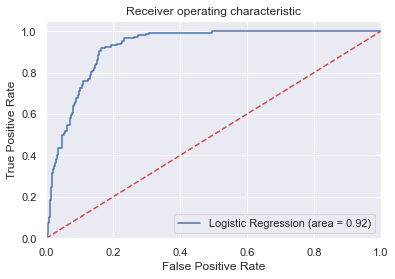

In [87]:
logit_roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Check the confusion matrix with the selected liblinear solver , with penalty applied = default

In [88]:
cm = metrics.confusion_matrix(y_test, y1_predict, labels=[1,0])
print('\033[94m \033[1mThe confusin matrix values are :\033[0m\n', cm)

 The confusin matrix values are :
 [[  51   95]
 [  33 1306]]


#### To print confusion matrix as a plot

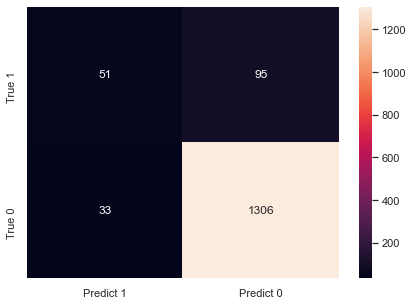

In [89]:
df_cm = pd.DataFrame(cm, index = [i for i in ["True 1", "True 0"]],
                     columns = [i for i in ["Predict 1", "Predict 0"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'd');

#### liblinear solver is better , based on score for test data , considering accuracy (0.9138047138047138) , precision (0.2760572127010483)  and recall (0.3493150684931507) scores . This also gives max AUC value for ROC (0.6623349054190921).

In [90]:
# newton-cg gives warning on max iterations for convergence. Hence seperated out from other solvers
s = ["newton-cg"]

for i in s:
    model2 = LogisticRegression(solver = i, max_iter = 200000000)
    model2.fit(x_train, y_train)

    # predict on test
    y2_predict = model2.predict(x_test)

    model_score_train2 = model2.score( x_train, y_train)
    print( 'Model Score for solver ', i, ' for training data is : ', model_score_train2)
    model_score_test2 = model2.score( x_test, y_test)
    print(  'Model Score for solver ', i, ' for test data is : ', model_score_test2)
    roc_auc_score(y_test, model2.predict_proba(x_test)[:,1])
    print( 'ROC AUC value is : ', roc_auc_score(y_test, model2.predict_proba(x_test)[:,1]), '\n')
    print('\033[94m\033[1mThe y_predict ACCURACY score with Testing data for model, ', 'with solver ',i,' is : \033[0m' , metrics.accuracy_score( y_test , y2_predict))

    print('\033[94m\033[1mThe PRECISION score for model,',  'with solver ',i,' is \033[0m', metrics.average_precision_score( y_test, y2_predict) )

    print('\033[94m\033[1mThe RECALL score for model, ', 'with solver ',i, ' is \033[0m'  , metrics.recall_score( y_test, y2_predict))
    
    print('\033[94m\033[1mThe weighted F1 score for model ', ' is \033[0m'  , metrics.f1_score( y_test, y2_predict, average='weighted'), '\n')

C:\Users\cgunn\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\cgunn\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\cgunn\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\cgunn\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\cgunn\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

Model Score for solver  newton-cg  for training data is :  0.9592720970537262
Model Score for solver  newton-cg  for test data is :  0.9629629629629629
ROC AUC value is :  0.9627251987273266 

The y_predict ACCURACY score with Testing data for model,  with solver  newton-cg  is :  0.9629629629629629
The PRECISION score for model, with solver  newton-cg  is  0.6590342894657323
The RECALL score for model,  with solver  newton-cg  is  0.678082191780822
The weighted F1 score for model   is  0.9603741457288368 



C:\Users\cgunn\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\cgunn\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\cgunn\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\cgunn\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\cgunn\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

### 5.1 Observations : Testing with different solvers , with other parameters as default:

Since newton-cg gave convergance warning , even after increasing max_iter, we will consider scores from 'liblinear', 'sag', 'saga' only .

The best scores are from solvers liblinear and lbfgs . Selecting liblinear as better solver for the model , with higher AUC. The scores are :

    1> Model Score for Training data , for solver  liblinear  for training data is :  0.9041016753321779
    2> Model Score for Testing data , for solver  liblinear  for test data is :  0.9138047138047138
    3> ROC AUC value   with solver  liblinear  is : 0.923757250861919
    4> The y_predict ACCURACY score with Testing data for model,  with solver  liblinear  is :  0.9138047138047138
    5> The PRECISION score for model, with solver  liblinear  is  0.2760572127010483
    6> The RECALL score for model,  with solver  liblinear  is  0.3493150684931507
    7> The weighted F1 score for model   is  0.9031622904171304  

##  5.2 Test with penalty parameter added

### 5.2.1 Add penalty as none and check

In [91]:
i = ''
s = ['saga', 'sag', 'lbfgs'] # Not supported for liblinear 
t = ['none'] # ['l1', 'l2', 'elasticnet', 'none']

for i in s:
    model3 = LogisticRegression(solver = i, penalty = 'none' , max_iter = 10000)
    model3.fit(x_train, y_train)

    # predict on test
    y3_predict = model3.predict(x_test)
    
    model_score_train3 = model3.score( x_train, y_train)
    print( '\033[94m\033[1mModel Score for solver ', i, ' penalty ' ,t, ' for training data is : \033[0m', model_score_train3)
    model_score_test3 = model3.score( x_test, y_test)
    print(  '\033[94m\033[1mModel Score for solver ', i, ' penalty ', t, ' for test data is : \033[0m', model_score_test3)
    roc_auc_score(y_test, model3.predict_proba(x_test)[:,1])
    print( '\033[94m\033[1mROC AUC value is : \033[0m', roc_auc_score(y_test, model3.predict_proba(x_test)[:,1]))
    print('\033[94m\033[1mThe y_predict ACCURACY score with Testing data for model,', 'with solver ',i, 
          ' & penalty ', t, ' is : \033[0m' , metrics.accuracy_score( y_test , y3_predict))

    print('\033[94m\033[1mThe PRECISION score for model,',  'with solver ',i,
          ' and penalty ', t,' is \033[0m', metrics.average_precision_score( y_test, y3_predict) )

    print('\033[94m\033[1mThe RECALL score for model, ', 'with solver ',i, 
          ' and penalty ', t,' is \033[0m'  , metrics.recall_score( y_test, y3_predict) )
    print('\033[94m\033[1mThe weighted F1 score for model ', ' is \033[0m'  , metrics.f1_score( y_test, y3_predict, average='weighted') , '\n')
    
    row_index = row_index + 1
    
    results_df_data = ['solver + penalty',i,'Not Norm',t,'default','default',i,model_score_train3,model_score_test3,roc_auc_score(y_test, model3.predict_proba(x_test)[:,1]), metrics.accuracy_score( y_test , y3_predict),
                      metrics.average_precision_score( y_test, y3_predict),metrics.recall_score( y_test, y3_predict), 
                       metrics.f1_score( y_test, y3_predict, average='weighted') ]
    #print(row_index)
    #print(results_df)
    #print(results_df_data)
    results_df.loc[row_index] = results_df_data
#results_df.drop(index = [0] , inplace= True)
print('Dataframe of results :\n', results_df)

Model Score for solver  saga  penalty  ['none']  for training data is :  0.9032351242056614
Model Score for solver  saga  penalty  ['none']  for test data is :  0.9063973063973064
ROC AUC value is :  0.9219362231065914
The y_predict ACCURACY score with Testing data for model, with solver  saga  & penalty  ['none']  is :  0.9063973063973064
The PRECISION score for model, with solver  saga  and penalty  ['none']  is  0.14426953057090042
The RECALL score for model,  with solver  saga  and penalty  ['none']  is  0.0684931506849315
The weighted F1 score for model   is  0.8694633746995426 

Model Score for solver  sag  penalty  ['none']  for training data is :  0.901213171577123
Model Score for solver  sag  penalty  ['none']  for test data is :  0.907070707070707
ROC AUC value is :  0.9233326854021096
The y_predict ACCURACY score with Testing data for model, with solver  sag  & penalty  ['none']  is :  0.907070707070707
The PRECISION score for model, with solver  sag  and penalty  ['none']  

### Check the confusion matrix with the selected 'lbfgs' solver  due to high AUC score & max F1 score, with penalty applied = none

In [92]:
cm = metrics.confusion_matrix(y_test, y3_predict, labels=[1,0])
print('\033[94m \033[1mThe confusion matrix values are :\033[0m\n', cm)

 The confusion matrix values are :
 [[  51   95]
 [  34 1305]]


#### To print confusion matrix as a plot

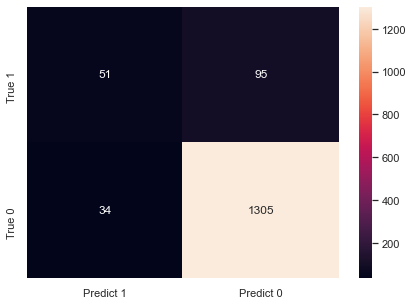

In [93]:
df_cm = pd.DataFrame(cm, index = [i for i in ["True 1", "True 0"]],
                     columns = [i for i in ["Predict 1", "Predict 0"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'd');

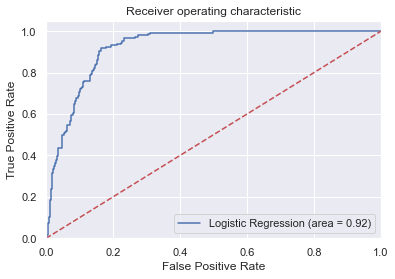

In [94]:
logit_roc_auc = roc_auc_score(y_test, model3.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model3.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 5.2.1 Observation  with 'lbfgs' solver selected (based on higher AUC) , using penalty = none :

With penalty as 'none' , scores for lbfgs and sag are are good , based on AUC value . However , based on The F1 value and Accuracy score , lbfgs solver is better . Scores are :

    1> Model Score for solver  lbfgs  penalty  ['none']  for training data is :  0.9038128249566725
    2> Model Score for solver  lbfgs  penalty  ['none']  for test data is :  0.9131313131313131
    3> ROC AUC value is :  0.9229490419143298
    4> The y_predict ACCURACY score with Testing data for model :  0.9131313131313131
    5> The PRECISION score for model, with solver  lbfgs  and penalty  ['none']  is  0.2735621050689544
    6> The RECALL score for model,  with solver  lbfgs  and penalty  ['none']  is  0.3493150684931507
    7> The weighted F1 score for model   is  0.9026289600221692 


### 5.2.2 Add L2 penalty and check all solvers

In [95]:
i =''
s = ['lbfgs', 'sag', 'saga', 'liblinear']
t = ['l2'] # ['l1', 'l2', 'elasticnet', 'none']

for i in s:
    model4 = LogisticRegression(solver = i, penalty = 'l2' , max_iter = 10000)
    model4.fit(x_train, y_train)

    # predict on test
    y4_predict = model4.predict(x_test)
    
    model_score_train4 = model4.score( x_train, y_train)
    print( '\033[94m\033[1mModel Score for solver ', i, '& penalty ' ,t, ' for training data is : \033[0m', model_score_train4)
    model_score_test4 = model4.score( x_test, y_test)
    print(  '\033[94m\033[1mModel Score for solver ', i, '& penalty ', t, ' for test data is : \033[0m', model_score_test4)
    roc_auc_score(y_test, model4.predict_proba(x_test)[:,1])
    print( '\033[94m\033[1mROC AUC value is : \033[0m', roc_auc_score(y_test, model4.predict_proba(x_test)[:,1], average='weighted'))
    
    print('\033[94m\033[1mThe y_predict ACCURACY score with Testing data for model,', 'with solver',i, 
          ' & penalty', t, 'is : \033[0m' , metrics.accuracy_score( y_test , y4_predict))

    print('\033[94m\033[1mThe PRECISION score for model,',  'with solver ',i,
          ' and penalty ', t,' is \033[0m', metrics.average_precision_score( y_test, y4_predict) )

    print('\033[94m\033[1mThe RECALL score for model, ', 'with solver ',i, 
          ' and penalty ', t,' is \033[0m'  , metrics.recall_score( y_test, y4_predict) )
    print('\033[94m\033[1mThe weighted F1 score for model ', ' is \033[0m'  , metrics.f1_score( y_test, y4_predict, average='weighted') , '\n')
    
    row_index = row_index + 1
    
    results_df_data = ['solver + penalty',i,'Not Norm',t,'default','default',i,model_score_train4,model_score_test4,roc_auc_score(y_test, model4.predict_proba(x_test)[:,1]), metrics.accuracy_score( y_test , y4_predict),
                      metrics.average_precision_score( y_test, y4_predict),metrics.recall_score( y_test, y4_predict), 
                       metrics.f1_score( y_test, y4_predict, average='weighted') ]
    #print(row_index)
    #print(results_df)
    #print(results_df_data)
    results_df.loc[row_index] = results_df_data

print('Dataframe of results :\n', results_df)

Model Score for solver  lbfgs & penalty  ['l2']  for training data is :  0.9038128249566725
Model Score for solver  lbfgs & penalty  ['l2']  for test data is :  0.9131313131313131
ROC AUC value is :  0.9229490419143298
The y_predict ACCURACY score with Testing data for model, with solver lbfgs  & penalty ['l2'] is :  0.9131313131313131
The PRECISION score for model, with solver  lbfgs  and penalty  ['l2']  is  0.2735621050689544
The RECALL score for model,  with solver  lbfgs  and penalty  ['l2']  is  0.3493150684931507
The weighted F1 score for model   is  0.9026289600221692 

Model Score for solver  sag & penalty  ['l2']  for training data is :  0.901213171577123
Model Score for solver  sag & penalty  ['l2']  for test data is :  0.907070707070707
ROC AUC value is :  0.9233326854021096
The y_predict ACCURACY score with Testing data for model, with solver sag  & penalty ['l2'] is :  0.907070707070707
The PRECISION score for model, with solver  sag  and penalty  ['l2']  is  0.1704649232

#### Model selected is with 'liblinear' solver , with L2 penalty. It has the best AUC , F1 and Accuracy scores

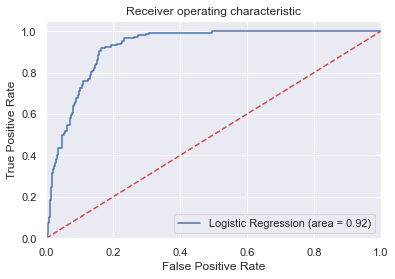

In [96]:
logit_roc_auc = roc_auc_score(y_test, model4.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model4.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Check the confusion matrix with the selected liblinear solver , with L2 penalty applied

In [97]:
cm = metrics.confusion_matrix(y_test, y4_predict, labels=[1,0])
print('\033[94m \033[1mThe confusin matrix values are :\033[0m\n', cm)

 The confusin matrix values are :
 [[  51   95]
 [  33 1306]]


#### To print confusion matrix as a plot

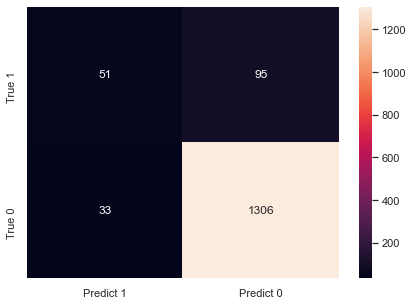

In [98]:
df_cm = pd.DataFrame(cm, index = [i for i in ["True 1", "True 0"]],
                     columns = [i for i in ["Predict 1", "Predict 0"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'd');

### 5.2.2 : Obseravtion with penalty as 'L2' , liblinear solver has best scores:

Not much difference in the scores. solvers lbfgs and liblinear have better scores , for test data. The AUC for ROC value is also similar , but is better for liblinear solver with L2 penalty , along with higher F1 and Accuracy scores . Scores are:

    1> Model Score for solver  liblinear & penalty  ['l2']  for training data is :  0.9041016753321779
    2> Model Score for solver  liblinear & penalty  ['l2']  for test data is :  0.9138047138047138
    3> ROC AUC value is :  0.923757250861919
    4> The y_predict ACCURACY score with Testing data for model is :  0.9138047138047138
    4> The PRECISION score for model, with solver  liblinear  and penalty  ['l2']  is  0.2760572127010483
    5> The RECALL score for model,  with solver  liblinear  and penalty  ['l2']  is  0.3493150684931507
    6> The weighted F1 score for model   is  0.9031622904171304 

### 5.2.3 Add 'elasticnet' penalty and check

In [99]:
i = ''
s = [ 'saga'] ##  'lbfgs'  , 'sag' only supports L2 & none. 'liblinear' does not support 'elasticnet' penalty
t = 'elasticnet'

for i in s:
    model5 = LogisticRegression(solver = i, penalty = 'elasticnet', l1_ratio = 0, max_iter = 10000)
    model5.fit(x_train, y_train)

    # predict on test
    y5_predict = model5.predict(x_test)
    
    model_score_train5 = model5.score( x_train, y_train)
    print( '\033[94m\033[1mModel Score for solver', i, ' penalty ' ,t, ' for training data is :  \033[0m', model_score_train5)
    model_score_test5 = model5.score( x_test, y_test)
    print(  '\033[94m\033[1mModel Score for solver', i, ' penalty ', t, ' for test data is :  \033[0m', model_score_test5)
    roc_auc_score(y_test, model5.predict_proba(x_test)[:,1])
    print( '\033[94m\033[1mROC AUC value is : \033[0m', roc_auc_score(y_test, model5.predict_proba(x_test)[:,1], average = 'weighted'))
    
    print('\033[94m\033[1mThe y_predict ACCURACY score with Testing data for model,', 'with solver',i, 
          '& penalty', t, 'is : \033[0m' , metrics.accuracy_score( y_test , y5_predict))

    print('\033[94m\033[1mThe PRECISION score for model,',  'with solver ',i,
          ' and penalty ', t,' is \033[0m', metrics.average_precision_score( y_test, y5_predict) )

    print('\033[94m\033[1mThe RECALL score for model, ', 'with solver ',i, 
          ' and penalty ', t,' is \033[0m'  , metrics.recall_score( y_test, y5_predict) )
    print('\033[94m\033[1mThe weighted F1 score for model ', ' is \033[0m'  , metrics.f1_score( y_test, y5_predict, average='weighted') , '\n')
    
    row_index = row_index + 1
    
    results_df_data = ['solver + penalty',i,'Not Norm',t,'default','default',i,model_score_train5,model_score_test5,roc_auc_score(y_test, model5.predict_proba(x_test)[:,1]), metrics.accuracy_score( y_test , y5_predict),
                      metrics.average_precision_score( y_test, y5_predict),metrics.recall_score( y_test, y5_predict), 
                       metrics.f1_score( y_test, y5_predict, average='weighted') ]
    #print(row_index)
    #print(results_df)
    #print(results_df_data)
    results_df.loc[row_index] = results_df_data

print('Dataframe of results :\n', results_df)

Model Score for solver saga  penalty  elasticnet  for training data is :   0.9032351242056614
Model Score for solver saga  penalty  elasticnet  for test data is :   0.9063973063973064
ROC AUC value is :  0.9219362231065914
The y_predict ACCURACY score with Testing data for model, with solver saga & penalty elasticnet is :  0.9063973063973064
The PRECISION score for model, with solver  saga  and penalty  elasticnet  is  0.14426953057090042
The RECALL score for model,  with solver  saga  and penalty  elasticnet  is  0.0684931506849315
The weighted F1 score for model   is  0.8694633746995426 

Dataframe of results :
             scenario     solver Normalized     penalty class weight  C value  \
1       Diff solvers      lbfgs   Not Norm     default      default  default   
2       Diff solvers        sag   Not Norm     default      default  default   
3       Diff solvers       saga   Not Norm     default      default  default   
4       Diff solvers  liblinear   Not Norm     default    

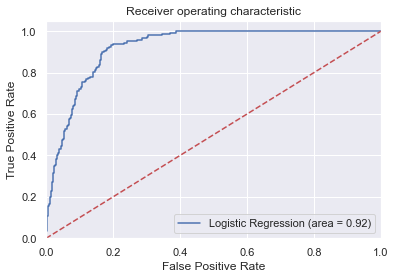

In [100]:
logit_roc_auc = roc_auc_score(y_test, model5.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model5.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 5.2.3 Observation on using solver 'saga' , with penalty = 'elasticnet' :

Still solvers lbfgs and liblinear have better scores , for test data, than the 'saga' solver  , as above test shows , with 'elasticnet' penalty parameter.  Also, the AUC value for the ROC curve is smaller : 0.5331263363581491 . Scores are :

    1> Model Score for solver saga  penalty  elasticnet  for training data is :   0.9032351242056614
    2> Model Score for solver saga  penalty  elasticnet  for test data is :   0.9063973063973064
    3> ROC AUC value is :  0.9219362231065914
    4> The y_predict ACCURACY score with Testing data for model :  0.9063973063973064
    5> The PRECISION score for model, with solver  saga  and penalty  elasticnet  is  0.14426953057090042
    6> The RECALL score for model,  with solver  saga  and penalty  elasticnet  is  0.0684931506849315
    7> The weighted F1 score for model   is  0.8694633746995426 

### 5.2.4 Add L1 penalty and check 

In [101]:
i = ''
s = [ 'saga' , 'liblinear'] ## 'lbfgs'  , 'sag' only supports L2 
t = ['l1']

for i in s:
    model6 = LogisticRegression(solver = i, penalty = 'l1', max_iter = 10000)
    model6.fit(x_train, y_train)

    # predict on test
    y6_predict = model6.predict(x_test)
    
    model_score_train6 = model6.score( x_train, y_train)
    print( '\033[94m\033[1mModel Score for solver ', i, '& penalty' ,t, 'for training data is : \033[0m', model_score_train6)
    model_score_test6 = model6.score( x_test, y_test)
    print(  '\033[94m\033[1mModel Score for solver ', i, '& penalty', t, 'for test data is : \033[0m', model_score_test6)
    roc_auc_score(y_test, model6.predict_proba(x_test)[:,1])
    print( '\033[94m\033[1mROC AUC value is : \033[0m', roc_auc_score(y_test, model6.predict_proba(x_test)[:,1]))
    
    print('\033[94m\033[1mThe y_predict ACCURACY score with Testing data for model,', 'with solver',i, 
          '& penalty', t, 'is : \033[0m' , metrics.accuracy_score( y_test , y6_predict))

    print('\033[94m\033[1mThe PRECISION score for model,',  'with solver ',i,
          ' and penalty ', t,' is \033[0m', metrics.average_precision_score( y_test, y6_predict) )

    print('\033[94m\033[1mThe RECALL score for model, ', 'with solver ',i, 
          ' and penalty ', t,' is \033[0m'  , metrics.recall_score( y_test, y6_predict) )
    print('\033[94m\033[1mThe weighted F1 score for model ', ' is \033[0m'  , metrics.f1_score( y_test, y6_predict, average='weighted') , '\n')
    
    row_index = row_index + 1
    
    results_df_data = ['solver + penalty',i,'Not Norm',t,'default','default',i,model_score_train6,model_score_test6,roc_auc_score(y_test, model6.predict_proba(x_test)[:,1]), metrics.accuracy_score( y_test , y6_predict),
                      metrics.average_precision_score( y_test, y6_predict),metrics.recall_score( y_test, y6_predict), 
                       metrics.f1_score( y_test, y6_predict, average='weighted') ]
    #print(row_index)
    #print(results_df)
    #print(results_df_data)
    results_df.loc[row_index] = results_df_data

print('Dataframe of results :\n', results_df)

Model Score for solver  saga & penalty ['l1'] for training data is :  0.9032351242056614
Model Score for solver  saga & penalty ['l1'] for test data is :  0.9063973063973064
ROC AUC value is :  0.9219362231065914
The y_predict ACCURACY score with Testing data for model, with solver saga & penalty ['l1'] is :  0.9063973063973064
The PRECISION score for model, with solver  saga  and penalty  ['l1']  is  0.14426953057090042
The RECALL score for model,  with solver  saga  and penalty  ['l1']  is  0.0684931506849315
The weighted F1 score for model   is  0.8694633746995426 

Model Score for solver  liblinear & penalty ['l1'] for training data is :  0.9604274985557482
Model Score for solver  liblinear & penalty ['l1'] for test data is :  0.9636363636363636
ROC AUC value is :  0.9629963067920243
The y_predict ACCURACY score with Testing data for model, with solver liblinear & penalty ['l1'] is :  0.9636363636363636
The PRECISION score for model, with solver  liblinear  and penalty  ['l1']  is 

### Printing intercept and coefficients for model solved with 'liblinear' with L1 penalty , which gives higher AUC , F1 and Accuracy scores

In [102]:
coef = pd.DataFrame(model6.coef_)
coef['intercept'] = model6.intercept_

print('\033[94m \033[1mCoefficients are :\033[0m\n', coef)
print('\n\033[94m \033[1mIntercept value is: \033[0m\n', coef['intercept'])

 Coefficients are :
          0         1         2         3         4         5         6  \
0 -0.03819  0.043664  0.063704 -0.000069  0.136654  0.000524 -0.994444   

          7         8         9       10        11        12   13        14  \
0  3.626253 -0.396417 -0.902384 -1.51554 -1.553171  0.296783  0.0 -4.058712   

    15        16  intercept  
0  0.0  0.075238        0.0  

 Intercept value is: 
 0    0.0
Name: intercept, dtype: float64


#### It can be seen above that the penalty L1 , with liblinear solver case, has reduced the coefficients for variables 13 and 15 to zero , thus eliminating those features.

In [103]:
# predict on test
y6_predict = model6.predict(x_test)

### Check the confusion matrix with the selected liblinear solver , with L1 penalty applied

In [104]:
cm = metrics.confusion_matrix(y_test, y6_predict, labels=[1,0])
print('\033[94m \033[1mThe confusin matrix values are :\033[0m\n', cm)

 The confusin matrix values are :
 [[ 100   46]
 [   8 1331]]


#### To print confusion matrix as a plot

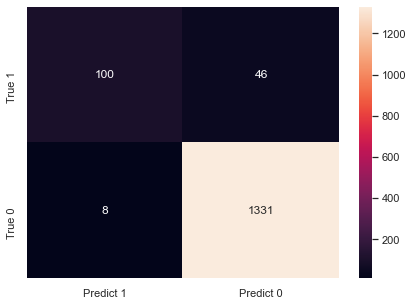

In [105]:
df_cm = pd.DataFrame(cm, index = [i for i in ["True 1", "True 0"]],
                     columns = [i for i in ["Predict 1", "Predict 0"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'd');

### Count of predicted True and False values for Personal Loans

In [106]:
predicted_person_loan_series = pd.Series(y6_predict)
predicted_person_loan_series

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1480    0.0
1481    0.0
1482    0.0
1483    0.0
1484    0.0
Length: 1485, dtype: float64

In [107]:
predicted_person_loan_series.value_counts()

0.0    1377
1.0     108
dtype: int64

#### ROC curve plotting for the selected liblinear solver with L1 penalty

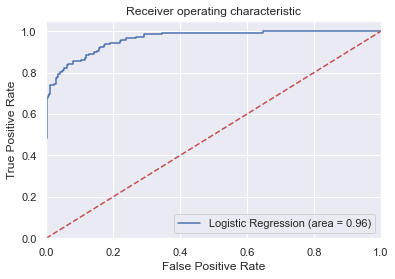

In [108]:
logit_roc_auc = roc_auc_score(y_test, model6.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model6.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 5.2 Observations with penalty = 'L1' , liblinear solver scores better between saga & liblinear:

The Accuracy score for test data has increased to 0.9636363636363636  , with liblinear solver , when L1 penalty is applied. The model accuracy score is 0.9636363636363636, using model_score method.  The precision (0.6651722706517227) and recall (0.684931506849315) is also higher. The AUC value is also good at 0.8394784494664799. Score details are :

    1> Model Score for solver  liblinear & penalty ['l1'] for training data is :  0.9604274985557482
    2> Model Score for solver  liblinear & penalty ['l1'] for test data is :  0.9636363636363636
    3> ROC AUC value is :  0.9628530798899199
    4> The y_predict ACCURACY score with Testing data for model is :  0.9636363636363636
    5> The PRECISION score for model, with solver  liblinear  and penalty  ['l1']  is  0.6651722706517227
    6> The RECALL score for model,  with solver  liblinear  and penalty  ['l1']  is  0.684931506849315
    7> The weighted F1 score for model   is  0.9611706338956928 

It can be seen above that the penalty L1 , with liblinear solver case, has reduced the coefficients for variables 13 and 15 to zero , thus eliminating those features.

Confusion matrix has also been plotted when model was run with L1 penalty

### 5.3 Try with normalized data for all solvers , to see if model score impoves

In [109]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [110]:
from sklearn import preprocessing

# v = data_train_test.drop(['Personal Loan', 'Family_1.0', 'Education_1.0'], axis=1)
v = data_train_test
min_max_scaler = preprocessing.MinMaxScaler()
v_scaled = min_max_scaler.fit_transform(v)
data_train_test_scaled = pd.DataFrame(v_scaled, columns = data_train_test.columns )  ## X1 is the df created earlier y dropping personal loan , Family_1.0 and Education_1.0 , but not normalized
data_train_test_scaled.head()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1.0,Family_2.0,Family_3.0,Family_4.0,Education_1.0,Education_2.0,Education_3.0
0,0.023256,0.023256,0.189815,0.165814,0.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.488372,0.441860,0.120370,0.012639,0.15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.348837,0.348837,0.013889,0.709449,0.10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.255814,0.209302,0.425926,0.617966,0.27,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.255814,0.186047,0.171296,0.199368,0.10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [111]:
X3 = data_train_test_scaled.drop(['Personal Loan'], axis=1)
Y3 = data_train_test_scaled['Personal Loan']
print(X3.head())
#print(Y3)

        Age  Experience    Income  ZIP Code  CCAvg  Mortgage  \
0  0.023256    0.023256  0.189815  0.165814   0.16       0.0   
1  0.488372    0.441860  0.120370  0.012639   0.15       0.0   
2  0.348837    0.348837  0.013889  0.709449   0.10       0.0   
3  0.255814    0.209302  0.425926  0.617966   0.27       0.0   
4  0.255814    0.186047  0.171296  0.199368   0.10       0.0   

   Securities Account  CD Account  Online  CreditCard  Family_1.0  Family_2.0  \
0                 1.0         0.0     0.0         0.0         0.0         0.0   
1                 1.0         0.0     0.0         0.0         0.0         0.0   
2                 0.0         0.0     0.0         0.0         1.0         0.0   
3                 0.0         0.0     0.0         0.0         1.0         0.0   
4                 0.0         0.0     0.0         1.0         0.0         0.0   

   Family_3.0  Family_4.0  Education_1.0  Education_2.0  Education_3.0  
0         0.0         1.0            1.0            0.0

In [112]:
x3_train , x3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size = 0.30, random_state = 5)

In [113]:
x3_train.head()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1.0,Family_2.0,Family_3.0,Family_4.0,Education_1.0,Education_2.0,Education_3.0
3489,0.441860,0.395349,0.152778,0.030846,0.220,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1538,0.255814,0.232558,0.296296,0.197863,0.230,0.448819,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1013,0.860465,0.813953,0.481481,0.002859,0.170,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1943,0.232558,0.232558,0.120370,0.760608,0.150,0.174803,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4675,0.395349,0.395349,0.231481,0.301535,0.267,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


#### Checking split of data

In [114]:
print(' Training set data is: ' , len(x3_train), 'which is {:2.2%}'.format(len(x3_train)/len(data_train_test_scaled)) )
print(' Testing set data is: ' , len(x3_test), 'which is {:2.2%}'.format(len(x3_test)/len(data_train_test_scaled)) )

 Training set data is:  3462 which is 69.98%
 Testing set data is:  1485 which is 30.02%


#### Person Loan True/False in the test & train data

In [115]:
train_true_count3 = y3_train.where(y3_train == True).count()
train_false_count3 = y3_train.where(y3_train == False).count()

test_true_count3 = y3_test.where(y3_test == True).count()
test_false_count3 = y3_test.where(y3_test == False).count()

print('True count total in Training dataset is: ', train_true_count3 , ', which is :{:2.2%}'.format(train_true_count3/(train_true_count3+train_false_count3)) )
print('False count total in Training dataset is: ', train_false_count3, ', which is {:2.2%}'.format(train_false_count3/(train_true_count3+train_false_count3)),'\n')

print('True count total in Test dataset is: ', test_true_count3 , ', which is :{:2.2%}'.format(test_true_count3/(test_true_count3+test_false_count3)) )
print('False count total in Test dataset is: ', test_false_count3, ', which is {:2.2%}'.format(test_false_count3/(test_true_count3+test_false_count3)))


True count total in Training dataset is:  334 , which is :9.65%
False count total in Training dataset is:  3128 , which is 90.35% 

True count total in Test dataset is:  146 , which is :9.83%
False count total in Test dataset is:  1339 , which is 90.17%


#### The True/False count for Personal loan in both train and test data is similar.Hence train data is a good representation

In [116]:
# Fit model on Training data
i = ''
s = ['liblinear', 'sag', 'saga', 'lbfgs']
t='default'

for i in s:
    model7 = LogisticRegression(solver = i,  max_iter = 10000)
    model7.fit(x3_train, y3_train)

    # predict on test
    y7_predict = model7.predict(x3_test)

    model_score_train7 = model7.score( x3_train, y3_train)
    print( '\033[94m\033[1mModel Score for solver ', i,  ' for training data is : \033[0m', model_score_train7)
    model_score_test7 = model7.score( x3_test, y3_test)
    print(  '\033[94m\033[1mModel Score for solver ', i,  ' for test data is : \033[0m', model_score_test7)
    roc_auc_score(y3_test, model7.predict_proba(x3_test)[:,1])
    print( '\033[94m\033[1mROC AUC value is : \033[0m', roc_auc_score(y3_test, model7.predict_proba(x3_test)[:,1]))
    
    print('\033[94m\033[1mThe y_predict ACCURACY score with Testing data for model,', 'with solver',i, 
          'is : \033[0m' , metrics.accuracy_score( y3_test , y7_predict))

    print('\033[94m\033[1mThe PRECISION score for model,',  'with solver ',i,
          ' is \033[0m', metrics.average_precision_score( y3_test, y7_predict) )

    print('\033[94m\033[1mThe RECALL score for model, ', 'with solver ',i, 
          ' is \033[0m'  , metrics.recall_score( y3_test, y7_predict) )
    print('\033[94m\033[1mThe weighted F1 score for model ', ' is \033[0m'  , metrics.f1_score( y3_test, y7_predict, average='weighted') , '\n')
    
    row_index = row_index + 1
    
    results_df_data = ['Diff solvers',i,'Normalized',t,'default','default',i,model_score_train7,model_score_test7,roc_auc_score(y_test, model7.predict_proba(x3_test)[:,1]), metrics.accuracy_score( y_test , y7_predict),
                      metrics.average_precision_score( y_test, y7_predict),metrics.recall_score( y_test, y7_predict), 
                       metrics.f1_score( y_test, y7_predict, average='weighted') ]
    #print(row_index)
    #print(results_df)
    #print(results_df_data)
    results_df.loc[row_index] = results_df_data

print('Dataframe of results :\n', results_df)

Model Score for solver  liblinear  for training data is :  0.9552281917966493
Model Score for solver  liblinear  for test data is :  0.9622895622895623
ROC AUC value is :  0.9641472372553633
The y_predict ACCURACY score with Testing data for model, with solver liblinear is :  0.9622895622895623
The PRECISION score for model, with solver  liblinear  is  0.6524941192749412
The RECALL score for model,  with solver  liblinear  is  0.6506849315068494
The weighted F1 score for model   is  0.9590821964375921 

Model Score for solver  sag  for training data is :  0.9560947429231658
Model Score for solver  sag  for test data is :  0.9622895622895623
ROC AUC value is :  0.9641421220088595
The y_predict ACCURACY score with Testing data for model, with solver sag is :  0.9622895622895623
The PRECISION score for model, with solver  sag  is  0.6524941192749412
The RECALL score for model,  with solver  sag  is  0.6506849315068494
The weighted F1 score for model   is  0.9590821964375921 

Model Score 

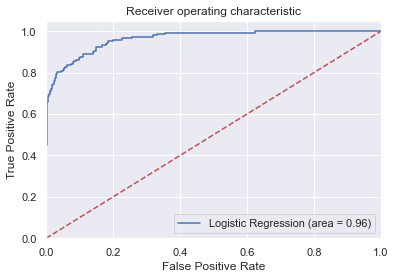

In [117]:
logit_roc_auc = roc_auc_score(y3_test, model7.predict_proba(x3_test)[:,1])
fpr, tpr, thresholds = roc_curve(y3_test, model7.predict_proba(x3_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

###  5.3 Observations with Normailzed data , selecting lbfgs solver model scores, though other solvers also have very close scores:

The scores are better using the normalized variables for accuracy score with Train and Test data, as compared to default parameters. Scores are : 

    1> Model Score for solver  lbfgs  for training data is :  0.9560947429231658
    2> Model Score for solver  lbfgs  for test data is :  0.9622895622895623
    3> ROC AUC value is :  0.9641472372553632
    4> The y_predict ACCURACY score with Testing data for model, with solver lbfgs is :  0.9622895622895623
    5> The PRECISION score for model, with solver  lbfgs  is  0.6524941192749412
    6> The RECALL score for model,  with solver  lbfgs  is  0.6506849315068494
    7> The weighted F1 score for model   is  0.9590821964375921 

###  5.4 Test using penalty also , with normalized data

### 5.4.1 Add L2 penalty and check all solvers , with Normalized data

In [118]:
i = ''
s = ['lbfgs', 'saga', 'sag','liblinear']
t = ['l2'] # ['l1', 'l2', 'elasticnet', 'none']

for i in s:
    model8 = LogisticRegression(solver = i, penalty = 'l2' , max_iter = 10000)
    model8.fit(x3_train, y3_train)

    # predict on test
    y8_predict = model8.predict(x3_test)
    
    model_score_train8 = model8.score( x3_train, y3_train)
    print( '\033[94m\033[1mModel Score for solver ', i, ' penalty ' ,t, ' for training data is : \033[0m', model_score_train8)
    model_score_test8 = model8.score( x3_test, y3_test)
    print(  '\033[94m\033[1mModel Score for solver ', i, ' penalty ', t, ' for test data is : \033[0m', model_score_test8)
    roc_auc_score(y3_test, model8.predict_proba(x3_test)[:,1])
    print( '\033[94m\033[1mROC AUC value is : \033[0m', roc_auc_score(y3_test, model8.predict_proba(x3_test)[:,1]))
    
    print('\033[94m\033[1mThe y_predict ACCURACY score with Testing data for model,', 'with solver',i, 
          '& penalty', t, 'is : \033[0m' , metrics.accuracy_score( y3_test , y8_predict))

    print('\033[94m\033[1mThe PRECISION score for model,',  'with solver ',i,
          ' and penalty ', t,' is \033[0m', metrics.average_precision_score( y3_test, y8_predict) )

    print('\033[94m\033[1mThe RECALL score for model, ', 'with solver ',i, 
          ' and penalty ', t,' is \033[0m'  , metrics.recall_score( y3_test, y8_predict) )
    print('\033[94m\033[1mThe weighted F1 score for model ', ' is \033[0m'  , metrics.f1_score( y3_test, y8_predict, average='weighted') , '\n')
    
    row_index = row_index + 1
    
    results_df_data = ['solver + penalty',i,'Normalized',t,'default','default',i,model_score_train8,model_score_test8,roc_auc_score(y3_test, model8.predict_proba(x3_test)[:,1]), metrics.accuracy_score( y3_test , y8_predict),
                      metrics.average_precision_score( y3_test, y8_predict),metrics.recall_score( y3_test, y8_predict), 
                       metrics.f1_score( y3_test, y8_predict, average='weighted') ]
    #print(row_index)
    #print(results_df)
    #print(results_df_data)
    results_df.loc[row_index] = results_df_data

print('Dataframe of results :\n', results_df)

Model Score for solver  lbfgs  penalty  ['l2']  for training data is :  0.9560947429231658
Model Score for solver  lbfgs  penalty  ['l2']  for test data is :  0.9622895622895623
ROC AUC value is :  0.9641472372553632
The y_predict ACCURACY score with Testing data for model, with solver lbfgs & penalty ['l2'] is :  0.9622895622895623
The PRECISION score for model, with solver  lbfgs  and penalty  ['l2']  is  0.6524941192749412
The RECALL score for model,  with solver  lbfgs  and penalty  ['l2']  is  0.6506849315068494
The weighted F1 score for model   is  0.9590821964375921 

Model Score for solver  saga  penalty  ['l2']  for training data is :  0.9560947429231658
Model Score for solver  saga  penalty  ['l2']  for test data is :  0.9622895622895623
ROC AUC value is :  0.9641421220088595
The y_predict ACCURACY score with Testing data for model, with solver saga & penalty ['l2'] is :  0.9622895622895623
The PRECISION score for model, with solver  saga  and penalty  ['l2']  is  0.652494119

#### Plotting ROC curve for the model with liblinear solver and L2 penalty. Other solvers give very similar scores

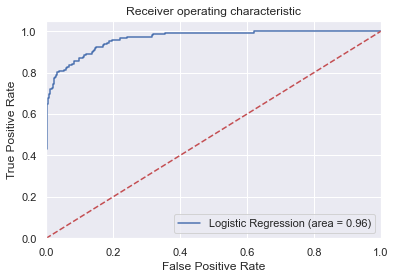

In [119]:
logit_roc_auc = roc_auc_score(y3_test, model8.predict_proba(x3_test)[:,1])
fpr, tpr, thresholds = roc_curve(y3_test, model8.predict_proba(x3_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### 5.4.1 Observations - Normalized data with L2 penalty , 'saga' solver :

Not much difference in the scores or AUC value , with Normalized data and using L2 penalty for multiple solvers.The score (0.9622895622895623) and AUC values (0.8234754007795637) are high. Choosing 'saga' solver . 

    1> Model Score for solver  liblinear  penalty  ['l2']  for training data is :  0.9552281917966493
    2> Model Score for solver  liblinear  penalty  ['l2']  for test data is :  0.9622895622895623
    3> ROC AUC value is :  0.9641472372553633
    4> The y_predict ACCURACY score with Testing data for model :  0.9622895622895623
    5> The PRECISION score for model, with solver  liblinear  and penalty  ['l2']  is  0.6524941192749412
    6> The RECALL score for model,  with solver  liblinear  and penalty  ['l2']  is  0.6506849315068494
    7> The weighted F1 score for model   is  0.9590821964375921

###  5.4.2 : Add 'elasticnet' penalty and check

In [120]:
i = ''
s = [ 'saga'] ##  'lbfgs'  , 'sag' only supports L2 & none. 'liblinear' does not support 'elasticnet' penalty
t = ['elasticnet']

for i in s:
    model9 = LogisticRegression(solver = i, penalty = 'elasticnet', l1_ratio = 0, max_iter = 10000)
    model9.fit(x3_train, y3_train)

    # predict on test
    y9_predict = model9.predict(x3_test)
    
    model_score_train9 = model9.score( x3_train, y3_train)
    print( '\033[94m\033[1mModel Score for solver ', i, ' penalty ' ,t, ' for training data is : \033[0m', model_score_train9)
    model_score_test9 = model9.score( x3_test, y3_test)
    print(  '\033[94m\033[1mModel Score for solver ', i, ' penalty ', t, ' for test data is : \033[0m', model_score_test9)
    roc_auc_score(y3_test, model9.predict_proba(x3_test)[:,1])
    print( '\033[94m\033[1mROC AUC value is : \033[0m', roc_auc_score(y3_test, model9.predict_proba(x3_test)[:,1]))
    
        
    print('\033[94m\033[1mThe y_predict ACCURACY score with Testing data for model,', 'with solver',i, 
          '& penalty', t, 'is :\033[0m' , metrics.accuracy_score( y3_test , y9_predict))

    print('\033[94m\033[1mThe PRECISION score for model,',  'with solver ',i,
          ' and penalty ', t,' is\033[0m', metrics.average_precision_score( y3_test, y9_predict) )

    print('\033[94m\033[1mThe RECALL score for model, ', 'with solver ',i, 
          ' and penalty ', t,' is \033[0m'  , metrics.recall_score( y3_test, y9_predict))
    print('\033[94m\033[1mThe weighted F1 score for model ', ' is \033[0m'  , metrics.f1_score( y3_test, y9_predict, average='weighted') , '\n')
    
    row_index = row_index + 1
    
    results_df_data = ['solver + penalty',i,'Normalized',t,'default','default',i,model_score_train9,model_score_test9,roc_auc_score(y3_test, model9.predict_proba(x3_test)[:,1]), metrics.accuracy_score( y3_test , y9_predict),
                      metrics.average_precision_score( y3_test, y9_predict),metrics.recall_score( y3_test, y9_predict), 
                       metrics.f1_score( y3_test, y9_predict, average='weighted') ]
    #print(row_index)
    #print(results_df)
    #print(results_df_data)
    results_df.loc[row_index] = results_df_data

print('Dataframe of results :\n', results_df)

Model Score for solver  saga  penalty  ['elasticnet']  for training data is :  0.9560947429231658
Model Score for solver  saga  penalty  ['elasticnet']  for test data is :  0.9622895622895623
ROC AUC value is :  0.9641421220088595
The y_predict ACCURACY score with Testing data for model, with solver saga & penalty ['elasticnet'] is : 0.9622895622895623
The PRECISION score for model, with solver  saga  and penalty  ['elasticnet']  is 0.6524941192749412
The RECALL score for model,  with solver  saga  and penalty  ['elasticnet']  is  0.6506849315068494
The weighted F1 score for model   is  0.9590821964375921 

Dataframe of results :
             scenario     solver  Normalized       penalty class weight  \
1       Diff solvers      lbfgs    Not Norm       default      default   
2       Diff solvers        sag    Not Norm       default      default   
3       Diff solvers       saga    Not Norm       default      default   
4       Diff solvers  liblinear    Not Norm       default      de

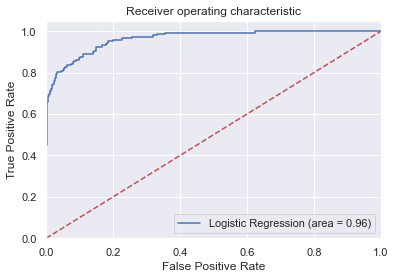

In [121]:
logit_roc_auc = roc_auc_score(y3_test, model9.predict_proba(x3_test)[:,1])
fpr, tpr, thresholds = roc_curve(y3_test, model9.predict_proba(x3_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

###  5.4.2 Observations - Normalized data , 'saga' solver , with 'elasticnet' penalty :

saga' solver , with 'elasticnet' penalty   have similar score for Accuracy of 0.96228  and AUC value of 0.9641421220088595 , for test data, as for the other solvers with L2 penalty. Scores are :
 
    1> Model Score for solver  saga  penalty  ['elasticnet']  for training data is :  0.9560947429231658
    2> Model Score for solver  saga  penalty  ['elasticnet']  for test data is :  0.9622895622895623
    3> ROC AUC value is :  0.9641421220088595
    4> The y_predict ACCURACY score with Testing data for model : 0.9622895622895623
    5> The PRECISION score for model, with solver  saga  and penalty  ['elasticnet']  is 0.6524941192749412
    6> The RECALL score for model,  with solver  saga  and penalty  ['elasticnet']  is  0.6506849315068494
    7> The weighted F1 score for model   is  0.9590821964375921 



###  5.4.3 - Add L1 penalty and check 

In [122]:
i = ''
s = ['liblinear', 'saga'] ## 'lbfgs'  , 'sag' only supports L2 
t = ['l1']

for i in s:
    model10 = LogisticRegression(solver = i, penalty = 'l1', max_iter = 10000)
    model10.fit(x3_train, y3_train)

    # predict on test
    y10_predict = model10.predict(x3_test)
    
    model_score_train10 = model10.score( x3_train, y3_train)
    print( '\033[94m\033[1mModel Score for solver ', i, ' penalty ' ,t, ' for training data is : \033[0m', model_score_train10)
    model_score_test10 = model10.score( x3_test, y3_test)
    print(  '\033[94m\033[1mModel Score for solver ', i, ' penalty ', t, ' for test data is : \033[0m', model_score_test10)
    roc_auc_score(y3_test, model10.predict_proba(x3_test)[:,1])
    print( '\033[94m\033[1mROC AUC value is : \033[0m', roc_auc_score(y3_test, model10.predict_proba(x3_test)[:,1]))
    
    print('\033[94m\033[1mThe y_predict ACCURACY score with Testing data for model,', 'with solver',i, 
          '& penalty', t, 'is :\033[0m' , metrics.accuracy_score( y3_test , y10_predict))

    print('\033[94m\033[1mThe PRECISION score for model,',  'with solver ',i,
          ' and penalty ', t,' is\033[0m', metrics.average_precision_score( y3_test, y10_predict) )

    print('\033[94m\033[1mThe RECALL score for model, ', 'with solver ',i, 
          ' and penalty ', t,' is \033[0m'  , metrics.recall_score( y3_test, y10_predict) )
    print('\033[94m\033[1mThe weighted F1 score for model ', ' is \033[0m'  , metrics.f1_score( y3_test, y10_predict, average='weighted') , '\n')
    
    row_index = row_index + 1
    
    results_df_data = ['solver + penalty',i,'Normalized',t,'default','default',i,model_score_train10,model_score_test10,roc_auc_score(y3_test, model10.predict_proba(x3_test)[:,1]), metrics.accuracy_score( y3_test , y10_predict),
                      metrics.average_precision_score( y3_test, y10_predict),metrics.recall_score( y3_test, y10_predict), 
                       metrics.f1_score( y3_test, y10_predict, average='weighted') ]
    #print(row_index)
    #print(results_df)
    #print(results_df_data)
    results_df.loc[row_index] = results_df_data

print('Dataframe of results :\n', results_df)

Model Score for solver  liblinear  penalty  ['l1']  for training data is :  0.9598497978047371
Model Score for solver  liblinear  penalty  ['l1']  for test data is :  0.9629629629629629
ROC AUC value is :  0.9628735408759348
The y_predict ACCURACY score with Testing data for model, with solver liblinear & penalty ['l1'] is : 0.9629629629629629
The PRECISION score for model, with solver  liblinear  and penalty  ['l1']  is 0.6588072505880725
The RECALL score for model,  with solver  liblinear  and penalty  ['l1']  is  0.6712328767123288
The weighted F1 score for model   is  0.9602172677711641 

Model Score for solver  saga  penalty  ['l1']  for training data is :  0.9595609474292317
Model Score for solver  saga  penalty  ['l1']  for test data is :  0.9636363636363636
ROC AUC value is :  0.9628530798899199
The y_predict ACCURACY score with Testing data for model, with solver saga & penalty ['l1'] is : 0.9636363636363636
The PRECISION score for model, with solver  saga  and penalty  ['l1']

In [123]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [124]:
coef = pd.DataFrame(model10.coef_)
coef['intercept'] = model10.intercept_

print('\033[94m \033[1mCoefficients are :\033[0m\n', coef)
print('\n\033[94m \033[1mIntercept value is: \033[0m\n', coef['intercept'])

 Coefficients are :
           0    1        2         3         4         5         6         7  \
0  0.118518  0.0  13.3279 -0.254621  1.184076  0.161337 -0.983838  3.562338   

          8        9        10        11        12        13        14   15  \
0 -0.386726 -0.89561 -1.455372 -1.483619  0.286069  0.000002 -3.880497  0.0   

         16  intercept  
0  0.066778   -6.48124  

 Intercept value is: 
 0   -6.48124
Name: intercept, dtype: float64


In [127]:
## Running again for saga model 
model11 = LogisticRegression(solver = 'saga', penalty = 'l1', max_iter = 10000)
model11.fit(x3_train, y3_train)

y11_predict = model11.predict(x3_test)

model_score_train11 = model11.score( x3_train, y3_train)
print( 'Model Score for solver ', i, ' penalty ' ,t, ' for training data is : ', model_score_train11)
model_score_test11 = model11.score( x3_test, y3_test)
print(  'Model Score for solver ', i, ' penalty ', t, ' for test data is : ', model_score_test11,'\n')
print('\033[94m\033[1mThe y_predict ACCURACY score with Testing data for model,', 'with solver',i, 
          '& penalty', t, 'is :\033[0m' , metrics.accuracy_score( y3_test , y11_predict))
roc_auc_score(y3_test, model11.predict_proba(x3_test)[:,1])
print( '\033[94m\033[1mROC AUC value is : \033[0m', roc_auc_score(y3_test, model11.predict_proba(x3_test)[:,1]))
print('\033[94m\033[1mThe weighted F1 score for model ', ' is \033[0m'  , metrics.f1_score( y_test, y11_predict, average='weighted') , '\n')

Model Score for solver  saga  penalty  ['l1']  for training data is :  0.9595609474292317
Model Score for solver  saga  penalty  ['l1']  for test data is :  0.9636363636363636 

The y_predict ACCURACY score with Testing data for model, with solver saga & penalty ['l1'] is : 0.9636363636363636
ROC AUC value is :  0.9628581951364236
The weighted F1 score for model   is  0.9610179371768777 



In [128]:
# predict on test , with the normalized data
y11_predict = model11.predict(x3_test)

### Check the confusion matrix with the selected 'saga' solver , with L1 penalty applied

In [129]:
cm = metrics.confusion_matrix(y3_test, y11_predict, labels=[1,0])
print('\033[94m \033[1mThe confusin matrix values are :\033[0m\n', cm)

 The confusin matrix values are :
 [[  99   47]
 [   7 1332]]


#### To print confusion matrix as a plot , for Liblinear solver , with L1 penalty applied , for Normalized data

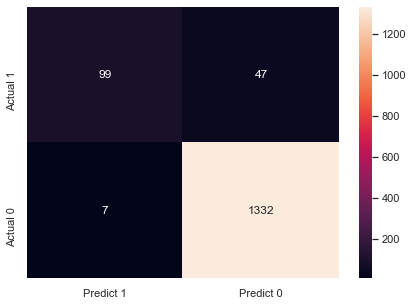

In [130]:
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1", "Actual 0"]],
                     columns = [i for i in ["Predict 1", "Predict 0"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'd');

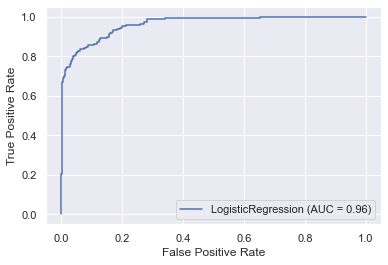

In [131]:
## Plot ROC Curve for saga solver ( max ROC among liblinear and saga solvers)
metrics.plot_roc_curve(model11.fit(x3_train, y3_train), x3_test, y3_test)
plt.show()

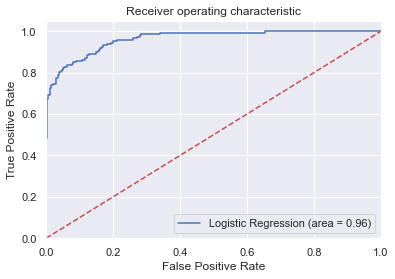

In [132]:
logit_roc_auc = roc_auc_score(y3_test, model11.predict_proba(x3_test)[:,1])
fpr, tpr, thresholds = roc_curve(y3_test, model11.predict_proba(x3_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

###  5.4 - Observations with Normalized data and L1 penalty :

1> It is seen that the solver 'saga' has higher 'Accuracy' score of 0.9636 , with L1 penalty , with normalized data. AUC = 0.9628530798899199

2> It can be seen that some coefficients have been reduced to zero - variables 1 , 13(almost zero)  and 15

3> The model score has increased to 0.9636 with normalized test data , with saga solver , when L1 penalty is applied. However , this is same score fo liblinear solver without normalized data obtained earlier, when L1 penalty was used. 

4> Scores :            
    4.a) Model Score for solver  saga  penalty  ['l1']  for training data is :  0.9595609474292317           
    4.b) Model Score for solver  saga  penalty  ['l1']  for test data is :  0.9636363636363636         
    4.c) ROC AUC value is :  0.9628530798899199        
    4.d) The y_predict ACCURACY score with Testing data for model, with solver saga & penalty ['l1'] is : 0.9636363636363636 
    4.e) The PRECISION score for model, with solver  saga  and penalty  ['l1']  is 0.6649530107658823         
    4.f) The RECALL score for model,  with solver  saga  and penalty  ['l1']  is  0.678082191780822           
    4.g) The weighted F1 score for model   is  0.9610179371768777       
    
5>  Confusion matrix has also been plotted

###  5.5 Test using Class weight parameter =  balance , with non-Normalized data

In [133]:
print(y_test)

2855    0.0
4158    0.0
2467    0.0
900     0.0
3837    0.0
       ... 
1032    0.0
286     0.0
3455    0.0
4552    0.0
3353    0.0
Name: Personal Loan, Length: 1485, dtype: float64


In [134]:
# Fit model on Training data
i = ''
s = ['lbfgs', 'sag', 'saga', 'liblinear']

for i in s:
    model12 = LogisticRegression(solver = i, class_weight = 'balanced', max_iter = 10000)
    model12.fit(x_train, y_train)

    # predict on test
    y12_predict = model12.predict(x_test)

    model_score_train12 = model12.score( x_train, y_train)
    print( '\033[94m\033[1mModel Score for solver ', i,  ' for training data is : \033[0m', model_score_train12)
    model_score_test12 = model12.score( x_test, y_test)
    print(  '\033[94m\033[1mModel Score for solver ', i,  ' for test data is : \033[0m', model_score_test12)
    roc_auc_score(y_test, model12.predict_proba(x_test)[:,1])
    print( '\033[94m\033[1mROC AUC value is : \033[0m', roc_auc_score(y_test, model12.predict_proba(x_test)[:,1]))
    
    print('\033[94m\033[1mThe y_predict ACCURACY score with Testing data for model,', 'with solver',i, 
          '& penalty', t, 'is :\033[0m' , metrics.accuracy_score( y_test , y12_predict))

    print('\033[94m\033[1mThe PRECISION score for model,',  'with solver ',i,
          ' and penalty ', t,' is\033[0m', metrics.average_precision_score( y_test, y12_predict) )

    print('\033[94m\033[1mThe RECALL score for model, ', 'with solver ',i, 
          ' and penalty ', t,' is \033[0m'  , metrics.recall_score( y_test, y12_predict) )
    
    print('The class weights used by the model are : ', compute_class_weight('balanced', np.unique(y_test), y_test))
    print('\033[94m\033[1mThe weighted F1 score for model ', ' is \033[0m'  , metrics.f1_score( y_test, y12_predict, average='weighted') , '\n')
    
    row_index = row_index + 1
    
    results_df_data = ['Diff solvers',i,'Not Norm','default','balanced','default',i,model_score_train12,model_score_test12,roc_auc_score(y_test, model12.predict_proba(x_test)[:,1]), metrics.accuracy_score( y_test , y12_predict),
                      metrics.average_precision_score( y_test, y12_predict),metrics.recall_score( y_test, y12_predict), 
                       metrics.f1_score( y_test, y12_predict, average='weighted') ]
    #print(row_index)
    #print(results_df)
    #print(results_df_data)
    results_df.loc[row_index] = results_df_data

print('Dataframe of results :\n', results_df)
#    print(np.unique(y_test))

Model Score for solver  lbfgs  for training data is :  0.8997689196995956
Model Score for solver  lbfgs  for test data is :  0.8929292929292929
ROC AUC value is :  0.9581777445855116
The y_predict ACCURACY score with Testing data for model, with solver lbfgs & penalty ['l1'] is : 0.8929292929292929
The PRECISION score for model, with solver  lbfgs  and penalty  ['l1']  is 0.4155781292767594
The RECALL score for model,  with solver  lbfgs  and penalty  ['l1']  is  0.8424657534246576
The class weights used by the model are :  [0.5545183  5.08561644]
The weighted F1 score for model   is  0.9055078399327913 

Model Score for solver  sag  for training data is :  0.865106874638937
Model Score for solver  sag  for test data is :  0.8585858585858586
ROC AUC value is :  0.9239055930105271
The y_predict ACCURACY score with Testing data for model, with solver sag & penalty ['l1'] is : 0.8585858585858586
The PRECISION score for model, with solver  sag  and penalty  ['l1']  is 0.32897811400746824
T

In [135]:
model12.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Check the confusion matrix with the selected 'liblinear' solver , with default L2 penalty applied , since that model has max AUC , F1 & Accuracy scores

In [136]:
cm = metrics.confusion_matrix(y_test, y12_predict, labels=[1,0])
print('\033[94m \033[1mThe confusin matrix values are :\033[0m\n', cm)

 The confusin matrix values are :
 [[ 124   22]
 [ 113 1226]]


#### To print confusion matrix as a plot , for Liblinear solver , with L1 penalty applied , for Normalized data

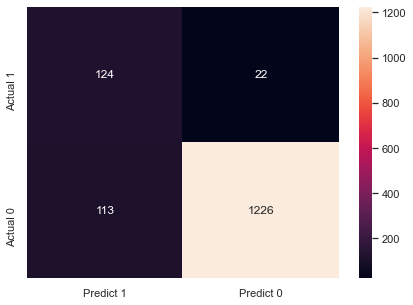

In [137]:
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1", "Actual 0"]],
                     columns = [i for i in ["Predict 1", "Predict 0"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'd');

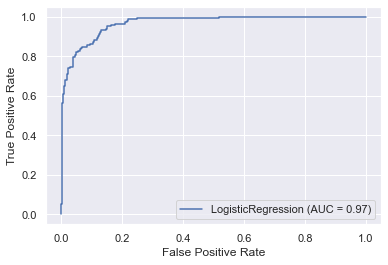

In [138]:
## Plot ROC Curve for liblinear solver ( max ROC among all solvers)
metrics.plot_roc_curve(model12.fit(x_train, y_train), x_test, y_test)
plt.show()

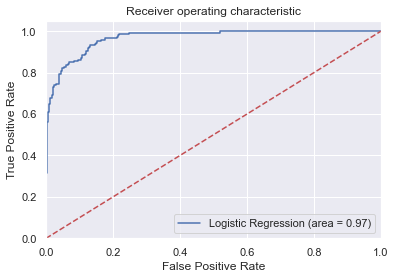

In [141]:
logit_roc_auc = roc_auc_score(y_test, model12.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model12.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 5.5 Obseravtions - using Class weight parameter =  balance , with non-Normalized data , Default L2 penalty  :

Above shows that score for model is good  when using class_weight as balanced. With class weight = 'balanced' , the best one is liblinear solver result. The results are:

    1> Model Score for solver  liblinear  for training data is :  0.9104563835932987
    2> Model Score for solver  liblinear  for test data is :  0.9090909090909091
    3> ROC AUC value is :  0.9676716420964325
    4> The y_predict ACCURACY score with Testing data for model : 0.9090909090909091
    5> The PRECISION score for model, with solver  liblinear  and penalty  ['l1']  is 0.4591821924230456
    6> The RECALL score for model,  with solver  liblinear  and penalty  ['l1']  is  0.8493150684931506
    7> The class weights used by the model are :  [0.5545183  5.08561644]
    8> The weighted F1 score for model   is  0.918291910537735


This is an imporvement over the running Logistic Regression with default parametrs , where Accuracy obtained was 0.9131313131313131 , Precision was 0.2735621050689544  , Recall score was 0.3493150684931507 and AUC was 0.922

### 5.6 : Test with C value changes 

In [142]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

####    Logistic Regression   , with default parameter C = 1. 

In [143]:
from sklearn.linear_model import LogisticRegression

i = ''
s = ['lbfgs', 'sag', 'saga', 'liblinear']

# Fit model on Training data
#model = LogisticRegression(solver = 'liblinear')
for i in s:
    model20 = LogisticRegression(solver = i, C = 1, max_iter = 10000)
    model20.fit(x_train, y_train)

    c_value = 1
    # predict on test
    y20_predict = model20.predict(x_test)

    model_score_train20 = model20.score( x_train, y_train)
    print( '\033[94m\033[1mModel Score for solver ', i,  ' for training data is : \033[0m', model_score_train20)
    model_score_test20 = model20.score( x_test, y_test)
    print(  '\033[94m\033[1mModel Score for solver ', i,  ' for test data is : \033[0m', model_score_test20)
    roc_auc_score(y_test, model20.predict_proba(x_test)[:,1])

    #print('\033[94m\033[1mThe coefficient values , with C value as ', c_value, ' are\033[0m\n', coef19, '\n')
    #print( '\033[94m\033[1mThe intercept value , with C value as ', c_value, ' is\033[0m\n', coef19['intercept'], '\n')

    print( '\033[94m\033[1mROC AUC value , with default C value as 1',' is\033[0m', roc_auc_score(y_test, model20.predict_proba(x_test)[:,1]))

    print('\033[94m\033[1mThe accuracy score for model , with default C value as 1',' is\033[0m' , metrics.accuracy_score( y_test , y20_predict))

    print('\033[94m\033[1mThe precision score for model , with default C value as 1',' is\033[0m', metrics.average_precision_score( y_test, y20_predict)  )

    print('\033[94m\033[1mThe recall score for model , with default C value as 1', ' is\033[0m'  , metrics.recall_score( y_test, y20_predict))
    print('\033[94m\033[1mThe weighted F1 score for model , with default C value as 1', ' is \033[0m'  , metrics.f1_score( y_test, y20_predict, average='weighted') , '\n')

    row_index = row_index + 1
    
    results_df_data = ['Diff solvers',i,'Not Norm','default','default','1',i,model_score_train20,model_score_test20,roc_auc_score(y_test, model20.predict_proba(x_test)[:,1]), metrics.accuracy_score( y_test , y20_predict),
                      metrics.average_precision_score( y_test, y20_predict),metrics.recall_score( y_test, y20_predict), 
                       metrics.f1_score( y_test, y20_predict, average='weighted') ]
    #print(row_index)
    #print(results_df)
    #print(results_df_data)
    results_df.loc[row_index] = results_df_data

print('Dataframe of results :\n', results_df)

Model Score for solver  lbfgs  for training data is :  0.9038128249566725
Model Score for solver  lbfgs  for test data is :  0.9131313131313131
ROC AUC value , with default C value as 1  is 0.9229490419143298
The accuracy score for model , with default C value as 1  is 0.9131313131313131
The precision score for model , with default C value as 1  is 0.2735621050689544
The recall score for model , with default C value as 1  is 0.3493150684931507
The weighted F1 score for model , with default C value as 1  is  0.9026289600221692 

Model Score for solver  sag  for training data is :  0.901213171577123
Model Score for solver  sag  for test data is :  0.907070707070707
ROC AUC value , with default C value as 1  is 0.9233326854021096
The accuracy score for model , with default C value as 1  is 0.907070707070707
The precision score for model , with default C value as 1  is 0.17046492320464923
The recall score for model , with default C value as 1  is 0.136986301369863
The weighted F1 score for

###    Results of  Logistic Regression was  performed  , with default parameter C = 1. Best result for model is with liblinear solver

####     The various metrics have been calculated for the model as:

    Model Score for solver  liblinear  for training data is :  0.9041016753321779
    Model Score for solver  liblinear  for test data is :  0.9138047138047138
    ROC AUC value , with default C value as 1  is 0.923757250861919
    The accuracy score for model , with default C value as 1  is 0.9138047138047138
    The precision score for model , with default C value as 1  is 0.2760572127010483
    The recall score for model , with default C value as 1  is 0.3493150684931507
    The weighted F1 score for model , with default C value as 1  is  0.9031622904171304 

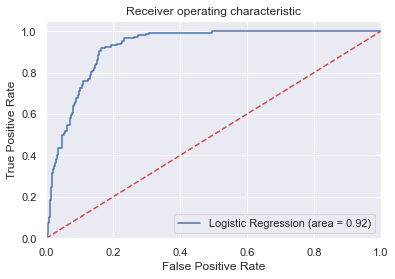

In [144]:
logit_roc_auc = roc_auc_score(y_test, model20.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model20.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Test using a parameter grid to find best value of C ( inverse of the regularising strength)

In [145]:
param_grid = {'C': [0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
clf = GridSearchCV(LogisticRegression(max_iter = 10000) , param_grid ) # Use cv for cross validation splitting as deafult = 5
                                                                        #  This gives five splits of data , split 0 to split 4
clf.fit(x_train, y_train)
print('\033[94m\033[1mThe value of C which gives the best results is :\033[0m', clf.best_params_)

The value of C which gives the best results is : {'C': 1}


In [146]:
print('\033[94m\033[1mBest score from all the different split data is : \033[0m', clf.best_score_)

Best score from all the different split data is :  0.9260515977278982


In [147]:
print(clf.best_index_)

4


In [148]:
print(clf.cv_results_)

{'mean_fit_time': array([0.03697443, 0.03384938, 0.0400373 , 0.03566995, 0.04764829,
       0.04274626, 0.05075912, 0.05226765, 0.05554342]), 'std_fit_time': array([0.00859743, 0.0031902 , 0.01465047, 0.00885658, 0.02824353,
       0.01323427, 0.01737769, 0.0312905 , 0.02912197]), 'mean_score_time': array([0.00312457, 0.        , 0.00312428, 0.        , 0.        ,
       0.00312481, 0.00040326, 0.00160594, 0.00040522]), 'std_score_time': array([0.00624914, 0.        , 0.00624857, 0.        , 0.        ,
       0.00624962, 0.00080652, 0.00321188, 0.00081043]), 'param_C': masked_array(data=[1e-05, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-05}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}, {'C': 10000}], 'split0_test_score': array([0.90764791, 0.91630592, 0.91630592, 0.91630592,

#### It can be seen that the C value that gives best score for model is C=1 . This happens to be the default C value 
#### also , in the LogisticRegression 

### 5.6 Observations - with C value = 1 :

1> The best value of C found by running GridSearchCV and Cross validation split of 5 , is the dfault value of C =1    

2> The model metrics with C = 1 are :

    Model Score for solver  liblinear  for training data is :  0.9041016753321779
    Model Score for solver  liblinear  for test data is :  0.9138047138047138
    ROC AUC value , with default C value as 1  is 0.923757250861919
    The accuracy score for model , with default C value as 1  is 0.9138047138047138
    The precision score for model , with default C value as 1  is 0.2760572127010483
    The recall score for model , with default C value as 1  is 0.3493150684931507
    The weighted F1 score for model , with default C value as 1  is  0.9031622904171304              



## Results dataframe with all test results - testing for improving the model

In [149]:
results_df

,scenario,solver,Normalized,penalty,class weight,C value,solver,Training score,Testing score,ROC AUC,Accuracy,Precision (average),Recall,F1 (weighted)
1,Diff solvers,lbfgs,Not Norm,default,default,default,lbfgs,0.903813,0.913131,0.922949,0.913131,0.273562,0.349315,0.902629
2,Diff solvers,sag,Not Norm,default,default,default,sag,0.901213,0.907071,0.923333,0.907071,0.170465,0.136986,0.879210
3,Diff solvers,saga,Not Norm,default,default,default,saga,0.903235,0.906397,0.921936,0.906397,0.144270,0.068493,0.869463
4,Diff solvers,liblinear,Not Norm,default,default,default,liblinear,0.904102,0.913805,0.923757,0.913805,0.276057,0.349315,0.903162
5,solver + penalty,saga,Not Norm,[none],default,default,saga,0.903235,0.906397,0.921936,0.906397,0.144270,0.068493,0.869463
6,solver + penalty,sag,Not Norm,[none],default,default,sag,0.901213,0.907071,0.923333,0.907071,0.170465,0.136986,0.879210
7,solver + penalty,lbfgs,Not Norm,[none],default,default,lbfgs,0.903813,0.913131,0.922949,0.913131,0.273562,0.349315,0.902629
8,solver + penalty,lbfgs,Not Norm,[l2],default,default,lbfgs,0.903813,0.913131,0.922949,0.913131,0.273562,0.349315,0.902629
9,solver + penalty,sag,Not Norm,[l2],default,default,sag,0.901213,0.907071,0.923333,0.907071,0.170465,0.136986,0.879210
10,solver + penalty,saga,Not Norm,[l2],default,default,saga,0.903235,0.906397,0.921936,0.906397,0.144270,0.068493,0.869463


### Select best model by arranging in descending for 'ROC AUC' , 'F1 (weighted)' and 'Accuracy' scores

In [150]:
results_df_1 = results_df.sort_values(by = ['ROC AUC' , 'F1 (weighted)', 'Accuracy'], ascending= False)
results_df_1

,scenario,solver,Normalized,penalty,class weight,C value,solver,Training score,Testing score,ROC AUC,Accuracy,Precision (average),Recall,F1 (weighted)
29,Diff solvers,liblinear,Not Norm,default,balanced,default,liblinear,0.910456,0.909091,0.967672,0.909091,0.459182,0.849315,0.918292
15,Diff solvers,liblinear,Normalized,default,default,default,liblinear,0.955228,0.962290,0.964147,0.962290,0.652494,0.650685,0.959082
21,solver + penalty,sag,Normalized,[l2],default,default,sag,0.956095,0.962290,0.964147,0.962290,0.652494,0.650685,0.959082
22,solver + penalty,liblinear,Normalized,[l2],default,default,liblinear,0.955228,0.962290,0.964147,0.962290,0.652494,0.650685,0.959082
18,Diff solvers,lbfgs,Normalized,default,default,default,lbfgs,0.956095,0.962290,0.964147,0.962290,0.652494,0.650685,0.959082
19,solver + penalty,lbfgs,Normalized,[l2],default,default,lbfgs,0.956095,0.962290,0.964147,0.962290,0.652494,0.650685,0.959082
16,Diff solvers,sag,Normalized,default,default,default,sag,0.956095,0.962290,0.964142,0.962290,0.652494,0.650685,0.959082
17,Diff solvers,saga,Normalized,default,default,default,saga,0.956095,0.962290,0.964142,0.962290,0.652494,0.650685,0.959082
20,solver + penalty,saga,Normalized,[l2],default,default,saga,0.956095,0.962290,0.964142,0.962290,0.652494,0.650685,0.959082
23,solver + penalty,saga,Normalized,[elasticnet],default,default,saga,0.956095,0.962290,0.964142,0.962290,0.652494,0.650685,0.959082


### The best model is obtained by:

    1> Data is not normalized
    2> Solver = liblinear
    3> Penalty = default , which is L2
    4> Class weight = balanced
    5> C value = Default , which is 1

The scores for this model are :
    
    a) Training score - 0.910456	
    b) Testing score -  0.909091
    c) ROC AUC - 0.882462
    d) Accuracy - 0.909091
    e) Precision (average) - 0.459182 
    f) Recall - 0.849315
    g) F1 (weighted) - 0.918292
        	     	 		             	

### Running the best model again 

In [151]:
# Fit model on Training data
i = ''
s = ['liblinear']

for i in s:
    model21 = LogisticRegression(solver = i, class_weight = 'balanced', max_iter = 10000)
    model21.fit(x_train, y_train)

    # predict on test
    y21_predict = model21.predict(x_test)

    model_score_train21 = model21.score( x_train, y_train)
    print( '\033[94m\033[1mModel Score for solver ', i,  ' for training data is : \033[0m', model_score_train21)
    model_score_test21 = model21.score( x_test, y_test)
    print(  '\033[94m\033[1mModel Score for solver ', i,  ' for test data is : \033[0m', model_score_test21)
    roc_auc_score(y_test, model21.predict_proba(x_test)[:,1])
    print( '\033[94m\033[1mROC AUC value is : \033[0m', roc_auc_score(y_test, model21.predict_proba(x_test)[:,1]))
    
    print('\033[94m\033[1mThe y_predict ACCURACY score with Testing data for model,', 'with solver',i, 
          '& penalty', t, 'is :\033[0m' , metrics.accuracy_score( y_test , y21_predict))

    print('\033[94m\033[1mThe PRECISION score for model,',  'with solver ',i,
          ' and penalty ', t,' is\033[0m', metrics.average_precision_score( y_test, y21_predict) )

    print('\033[94m\033[1mThe RECALL score for model, ', 'with solver ',i, 
          ' and penalty ', t,' is \033[0m'  , metrics.recall_score( y_test, y21_predict) )
    
    print('The class weights used by the model are : ', compute_class_weight('balanced', np.unique(y_test), y_test))
    print('\033[94m\033[1mThe weighted F1 score for model ', ' is \033[0m'  , metrics.f1_score( y_test, y21_predict, average='weighted') , '\n')
    
#     row_index = row_index + 1
    
#     results_df_data = ['Diff solvers',i,'Not Norm','default','balanced','default',i,model_score_train21,model_score_test21,roc_auc_score(y_test, y21_predict), metrics.accuracy_score( y_test , y21_predict),
#                       metrics.average_precision_score( y_test, y21_predict),metrics.recall_score( y_test, y21_predict), 
#                        metrics.f1_score( y_test, y21_predict, average='weighted') ]
#     #print(row_index)
#     #print(results_df)
#     #print(results_df_data)
#     results_df.loc[row_index] = results_df_data

# print('Dataframe of results :\n', results_df)
# #    print(np.unique(y_test))

Model Score for solver  liblinear  for training data is :  0.9104563835932987
Model Score for solver  liblinear  for test data is :  0.9090909090909091
ROC AUC value is :  0.9676716420964325
The y_predict ACCURACY score with Testing data for model, with solver liblinear & penalty ['l1'] is : 0.9090909090909091
The PRECISION score for model, with solver  liblinear  and penalty  ['l1']  is 0.4591821924230456
The RECALL score for model,  with solver  liblinear  and penalty  ['l1']  is  0.8493150684931506
The class weights used by the model are :  [0.5545183  5.08561644]
The weighted F1 score for model   is  0.918291910537735 



###  Draw the confusion matrix for best  selected model 'liblinear' solver , with default L2 penalty applied , Class weight = balanced , C value =1 , data is not normalized

In [152]:
cm = metrics.confusion_matrix(y_test, y21_predict, labels=[1,0])
print('\033[94m \033[1mThe confusin matrix values are :\033[0m\n', cm)

 The confusin matrix values are :
 [[ 124   22]
 [ 113 1226]]


#### To print confusion matrix as a plot , for Liblinear solver , with L1 penalty applied , for Normalized data

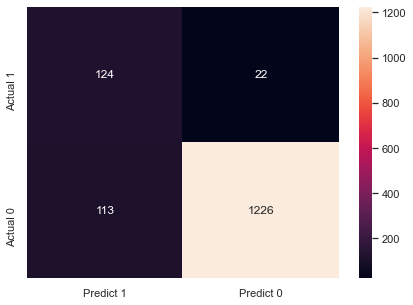

In [153]:
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1", "Actual 0"]],
                     columns = [i for i in ["Predict 1", "Predict 0"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'd');

### Drawing ROC curve for the best model

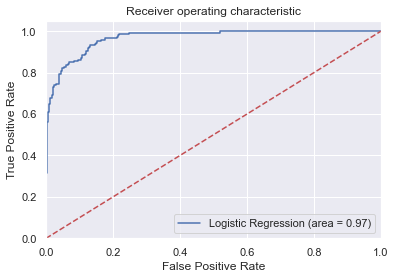

In [154]:
logit_roc_auc = roc_auc_score(y_test, model21.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model21.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [155]:
## To clear df . Run as needed
results_df = results_df[0:0]
print(results_df)

Empty DataFrame
Columns: [scenario, solver, Normalized, penalty, class weight, C value, solver, Training score, Testing score, ROC AUC, Accuracy, Precision (average), Recall, F1 (weighted)]
Index: []


### Ans. 5 Based  on multiple tests done above , and then selecting the best model, following are the observations on how to improve model accuracy. It lists multiple parameters changes that can be used to improve model performance

1> We can check with multiple solvers . Observation in Jupyter notebook cell 5.1 . These use different cost and gradient functions , hence we see different results from model. We can choose what solver works best for the data we have.  The solver newton-cg did not converge , even after setting max-iter=200000000 . Scores for liblinear solver, which has best AUC , accuracy , F1 scores ,  are as below :

    1> Model Score for Training data , for solver  liblinear  for training data is :  0.9041016753321779
    2> Model Score for Testing data , for solver  liblinear  for test data is :  0.9138047138047138
    3> ROC AUC value   with solver  liblinear  is : 0.923757250861919
    4> The y_predict ACCURACY score with Testing data for model,  with solver  liblinear  is :  0.9138047138047138
    5> The PRECISION score for model, with solver  liblinear  is  0.2760572127010483
    6> The RECALL score for model,  with solver  liblinear  is  0.3493150684931507
    7> The weighted F1 score for model   is  0.9031622904171304

2> We can change penalty and see which works better. Test results noted in Jupyter notebook cell 5.2.  As seen in above tests, the L1 penalty helped improve the score. Reason for this is that the model reduces the factors which may contribute to the prediction error . The best results were with 'liblinear' solver with 'L1' penalty, where data is not Normalized.  This model gives max AUC score , max F1 (weighted ) score & max Accuracy score. The scores for liblinear model with L1 penalty are:

    1> Model Score for solver  liblinear & penalty ['l1'] for training data is :  0.9610051993067591
    2> Model Score for solver  liblinear & penalty ['l1'] for test data is :  0.9636363636363636
    3> ROC AUC value is :  0.9631344184476249
    4> The y_predict ACCURACY score with Testing data for model, with liblinear & penalty ['l1'] is :  0.9636363636363636
    5> The PRECISION score for model, with solver  liblinear  and penalty  ['l1']  is  0.6651722706517227
    6> The RECALL score for model,  with solver  liblinear  and penalty  ['l1']  is  0.684931506849315
    7> The weighted F1 score for model   is  0.9611706338956928 

3> Normalize data : Observation in Jupyter notebook cell 5.3 . As seen above , we can normalize the data an get better prediction . Test results are noted in Jupyter notebook cell 5.3. The model AUC score increased to 0.96414 , as compared to model run with non-normalized data and default parameters , which has AUC values from 0.906 and 0 .913804 . Accuracy , F1 scores are also high, as comapared to model run with default parameters and non-normalized data. Normalizing makes sure that all variables are treated similarly , where variables that may show a large range as comapred other varaiables. Example Age as compared to ZIP Code or CCAvg. The selected model , with high AUC , Accuracy , F1 scores , has solver = lbfgs

    1> Model Score for solver  lbfgs  for training data is :  0.9560947429231658
    2> Model Score for solver  lbfgs  for test data is :  0.9622895622895623
    3> ROC AUC value is :  0.9641472372553632
    4> The y_predict ACCURACY score with Testing data for model, with solver lbfgs is :  0.9622895622895623
    5> The PRECISION score for model, with solver  lbfgs  is  0.6524941192749412
    6> The RECALL score for model,  with solver  lbfgs  is  0.6506849315068494
    7> The weighted F1 score for model   is  0.9590821964375921 


4> Run model with Normalized data and different penalties . Based on test results noted in Jupyter notebook cell 5.4 , the best results are with normalized data , with L1 penalty. The model scores are :

    1> Model Score for solver  saga  penalty  ['l1']  for training data is :  0.9595609474292317           
    2> Model Score for solver  saga  penalty  ['l1']  for test data is :  0.9636363636363636         
    3> ROC AUC value is :  0.9628530798899199        
    4> The y_predict ACCURACY score with Testing data for model, with solver saga & penalty ['l1'] is : 0.9636363636363636 
    5> The PRECISION score for model, with solver  saga  and penalty  ['l1']  is 0.6649530107658823         
    6> The RECALL score for model,  with solver  saga  and penalty  ['l1']  is  0.678082191780822           
    7> The weighted F1 score for model   is  0.9610179371768777

5> Adjust for Class imbalance using class_weight parameter, given the 'personal loan' data is 90% as compared to 10% of 'no personal loan'. As seen above , when using class_weigth as 'balanced' , the results of model score are better, as compared to running LogisticRegression with default parameters of 'none'. Results as in cell 5.5 in Jupyter notebook. 

Results shows that score for model is good when using class_weight as balanced. With class weight = 'balanced' , the best one is liblinear solver result. The results are:

    1> Model Score for solver  liblinear  for training data is :  0.9104563835932987
    2> Model Score for solver  liblinear  for test data is :  0.9090909090909091
    3> ROC AUC value is :  0.9676716420964325
    4> The y_predict ACCURACY score with Testing data for model : 0.9090909090909091
    5> The PRECISION score for model, with solver  liblinear  and penalty  ['l1']  is 0.4591821924230456
    6> The RECALL score for model,  with solver  liblinear  and penalty  ['l1']  is  0.8493150684931506
    7> The class weights used by the model are :  [0.5545183  5.08561644]
    8> The weighted F1 score for model   is  0.918291910537735

This is an improvement over the running Logistic Regression with default parametrs , where AUC was 0.922 , Accuracy obtained was 0.9131313131313131 , Precision was 0.2735621050689544 , Recall score was 0.3493150684931507.


6> Run Model with different values for C (Inverse of regularization strength) . Results as in cell 5.6 in Jupyter notebook.  The obseravtions from the Test is that the C value with best scores is C=1 , which is the default value. Score details are :

    a> The best value of C found by running GridSearchCV and Cross validation split of 5 , is the dfault value of C =1

    b> The model metrics with C = 1 are :

    1> Model Score for solver  liblinear  for training data is :  0.9041016753321779
    2> Model Score for solver  liblinear  for test data is :  0.9138047138047138
    3> ROC AUC value , with default C value as 1  is 0.923757250861919
    4> The accuracy score for model , with default C value as 1  is 0.9138047138047138
    5> The precision score for model , with default C value as 1  is 0.2760572127010483
    6> The recall score for model , with default C value as 1  is 0.3493150684931507
    7> The weighted F1 score for model , with default C value as 1  is  0.9031622904171304         
    
7> Use different Thresholds to classify the predicted probability . Results in cell 5.7 , in jupyter notebook. 

    The best model results using Thresold as an option is for:

    solver = liblinear
    data is not normalized
    penalty = default
    class weight = balanced
    Threshold = 0.75

    The model scores are :
        ROC AUC score = 0.967672
        Accuracy = 0.941414
        F1 weighted score = 0.942520
        Training data accuracy = 0.910456
        Testing data accuracy = 0.909091

## 6. Business Understanding of the model

### Confusion matrix :
    
    True Positive ( Actual and Predicted = 1 ) : 
        Personal loan actually was availed by the person predicted to avail the loan
        
    False Positive ( Predicted = 1 , but Actual = 0 ) :
        Model predicted that the person will avail personal loan , but in the Test data , the person did not avail loan
    
    True Negative ( Actual and Predicted = 0) :
        Model predicted that person will not opt for personal loan , and person did not avail of the loan , in the 
        Test data
        
    False Negative ( Predicted = 0 , but Actual = 1 ) :
        Model predicted that person will not avaial of loan , but in reality , in Test data , person did avaial the loan
        
#### Bank wants to increase conversion rate , which means we need to : 

    1> maximize the 'True Positive' cases , so that every person who is predicted to avail of the loan , does it. 
    2> minimize the 'False Positive' cases , so that bank does not spend money in targeting such persons who are 
        predicted to avail of the loan , but actually do not.
   
   At this time repayment capacity of the persons is not a consideration. 
   
   Given above , Precision is the important metric. Since Precision = ( Tp / ( Tp + Fp) , so minimizing Fp , will result in 
   a higher precision score. So we can select the model that maximises Precision . The model that meets this criteria is 
   the model named 'model11',  that was solved earlier, at index 25 in the results_df. The model has following 
   characteristics:
   
       1> Solver = saga
       2> Data is normalized
       3> Penalty = L1
       4> Class weight = default
       5> C value is default = 1
 
 The ROC curve and confusion matrix is plotted for this model in following cells.
 
 The confusion matrix for model11 has Tp = 99 and Fp = 7. This can be compared with the model , named model, run with all  
 defaults , where Tp = 51 and Fp = 34. It is seen that we have maximized Tp and minimized Fp in model11. 
 
 The bank can use this model to target the persons , based on the predicted score of 1, to maximize chance of converting
 the prospect , to avail a personal loan. The model has less False positives , thus bank will not waste more resources 
 in pursing persons who may not get converted for a loan

### Select model for max Precision by arranging in descending for 'Precision', followed by 'ROC AUC' , 'F1 (weighted)' and 'Accuracy' scores

In [510]:
results_df_2 = results_df.sort_values(by = ['Precision (average)', 'ROC AUC' , 'F1 (weighted)', 'Accuracy'], ascending= False)
results_df_2

,scenario,solver,Normalized,penalty,class weight,C value,solver,Training score,Testing score,ROC AUC,Accuracy,Precision (average),Recall,F1 (weighted)
14,solver + penalty,liblinear,Not Norm,[l1],default,default,liblinear,0.961005,0.963636,0.839478,0.963636,0.665172,0.684932,0.961171
25,solver + penalty,saga,Normalized,[l1],default,default,saga,0.959561,0.963636,0.836427,0.963636,0.664953,0.678082,0.961018
24,solver + penalty,liblinear,Normalized,[l1],default,default,liblinear,0.959850,0.962963,0.833003,0.962963,0.658807,0.671233,0.960217
15,Diff solvers,liblinear,Normalized,default,default,default,liblinear,0.955228,0.962290,0.823475,0.962290,0.652494,0.650685,0.959082
16,Diff solvers,sag,Normalized,default,default,default,sag,0.956095,0.962290,0.823475,0.962290,0.652494,0.650685,0.959082
17,Diff solvers,saga,Normalized,default,default,default,saga,0.956095,0.962290,0.823475,0.962290,0.652494,0.650685,0.959082
18,Diff solvers,lbfgs,Normalized,default,default,default,lbfgs,0.956095,0.962290,0.823475,0.962290,0.652494,0.650685,0.959082
19,solver + penalty,lbfgs,Normalized,[l2],default,default,lbfgs,0.956095,0.962290,0.823475,0.962290,0.652494,0.650685,0.959082
20,solver + penalty,liblinear,Normalized,[l2],default,default,liblinear,0.955228,0.962290,0.823475,0.962290,0.652494,0.650685,0.959082
21,solver + penalty,sag,Normalized,[l2],default,default,sag,0.956095,0.962290,0.823475,0.962290,0.652494,0.650685,0.959082


### Model 11 confusion matrix and ROC curve

In [511]:
# predict on test , with the normalized data
y11_predict = model11.predict(x3_test)

### Check the confusion matrix with the selected 'saga' solver , with L1 penalty applied

In [512]:
cm = metrics.confusion_matrix(y3_test, y11_predict, labels=[1,0])
print('\033[94m \033[1mThe confusin matrix values are :\033[0m\n', cm)

 The confusin matrix values are :
 [[  99   47]
 [   7 1332]]


#### To print confusion matrix as a plot , for Liblinear solver , with L1 penalty applied , for Normalized data

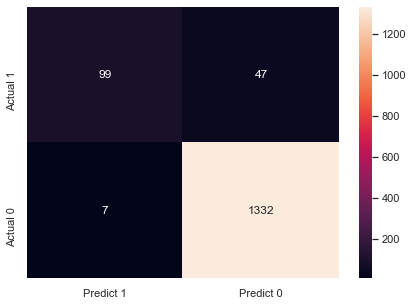

In [513]:
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1", "Actual 0"]],
                     columns = [i for i in ["Predict 1", "Predict 0"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'd');

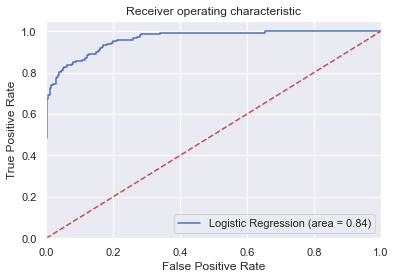

In [514]:
logit_roc_auc = roc_auc_score(y3_test, y11_predict)
fpr, tpr, thresholds = roc_curve(y3_test, model11.predict_proba(x3_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()